In [2]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(tidyr)
library(reshape2)
library(cowplot)

In [3]:
analysis <- function(X, Y, display_plot=TRUE){
    spearman <- cor(X, Y, use="pairwise.complete.obs", method="spearman")
    pearson <- cor(X, Y, use="pairwise.complete.obs", method="pearson")
    print(c("Pearson", pearson))
    print(c("Spearman", spearman))
    if (display_plot) {
        ggplot() + geom_point(aes(x=X, y=Y))
    }
}

regression <- function(X, Y, display_plot=TRUE){
    r <- cor(X, Y, use="pairwise.complete.obs")
    Sx <- sd(X)
    Sy <- sd(Y)
    a <- r * Sy / Sx
    b <- mean(Y) - a * mean(X)

    if(display_plot){
        xs <- seq(min(X), max(X), 0.01)
        plt <- ggplot() +
            geom_point(aes(x=X, y=Y), alpha=0.5) +
            geom_line(aes(x = xs, y = a * xs + b), linewidth=1, col="red")
        show(plt)
    }

    return(c(a, b))
}

In [33]:
data <- read.csv("data/data.csv")
data2000 <- data %>% filter(year == 2000)
data2005 <- data %>% filter(year == 2005)
data2010 <- data %>% filter(year == 2010)
data2014 <- data %>% filter(year == 2014)
data2015 <- data %>% filter(year == 2015)
poland <- data %>% filter(country == "Poland")

In [6]:
nans <- data.frame()
years <- sort(unique(data$year))
for (y in years) {
    data_year <- data %>% filter(year == y)
    ns <- c()
    for (column in colnames(data_year[4:22])) {
        n <- sum(is.na(data_year[column]))
        ns <- append(ns, n)
    }
    nans <- rbind(nans, ns)
}
nans <- cbind(years, nans)
names(nans) <- colnames(data[c(2, 4:22)])
df <- data.frame(t(nans), header=TRUE)
names(df) <- lapply(df[1, ], as.character)
df <- df[-1,1:16]
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
life_expectancy,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0
adult_mortality,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0
infant_deaths,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
alcohol,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,177
percentage_expenditure,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hepatitis_B,98,88,70,52,45,36,32,24,20,17,15,13,13,11,10,9
measles,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BMI,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2
under_five_deaths,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Developed a developing

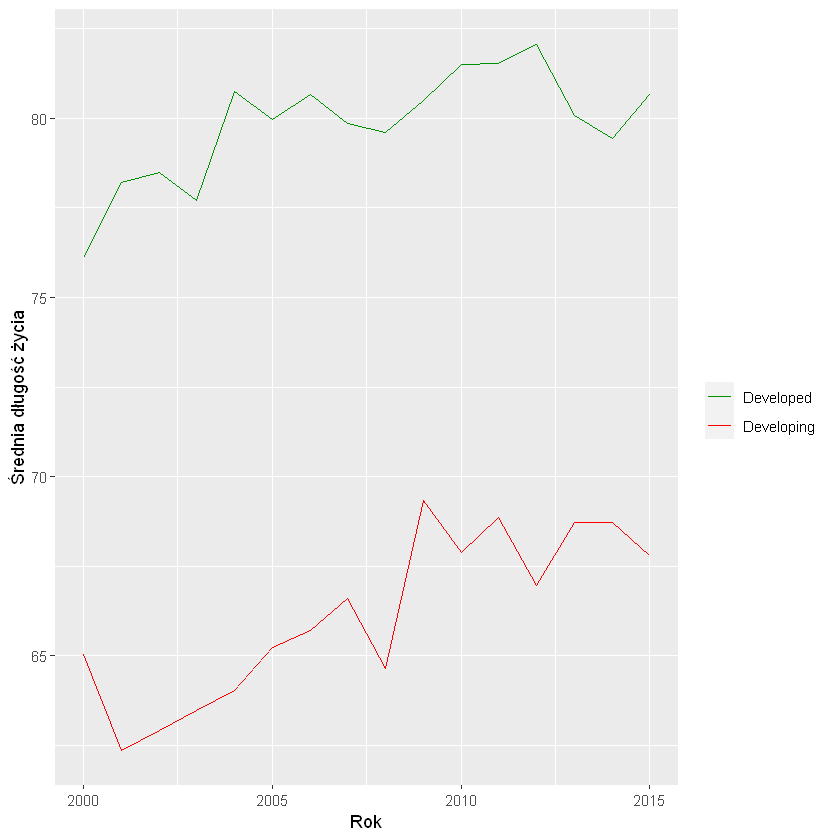

In [73]:
data_developed <- data %>% filter(status == 'Developed')
data_developing <- data %>% filter(status == 'Developing')

le1 <- c()
le2 <- c()
years <- sort(unique(data$year))

for (y in years) {
    data_year <- data_developed %>% filter(year == y & !is.na(life_expectancy) & !is.na(population))
    mean_lf <- sum(data_year$life_expectancy * data_year$population) / sum(data_year$population)
    le1 <- append(le1, mean_lf)
}

for (y in years) {
    data_year <- data_developing %>% filter(year == y & !is.na(life_expectancy) & !is.na(population))
    mean_lf <- sum(data_year$life_expectancy * data_year$population) / sum(data_year$population)
    le2 <- append(le2, mean_lf)
}

df <- melt(data.frame(years=years, y1=le1, y2=le2), id.var='years')
ggplot() + 
  geom_line(aes(x=years, y=le1, col='Developed')) + 
  geom_line(aes(x=years, y=le2, col='Developing')) + 
  scale_color_manual(values=c('#009000', 'red')) + xlab("Rok") + ylab("Średnia długość życia") + labs(col="")

Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 453 rows containing missing values (`geom_point()`)."


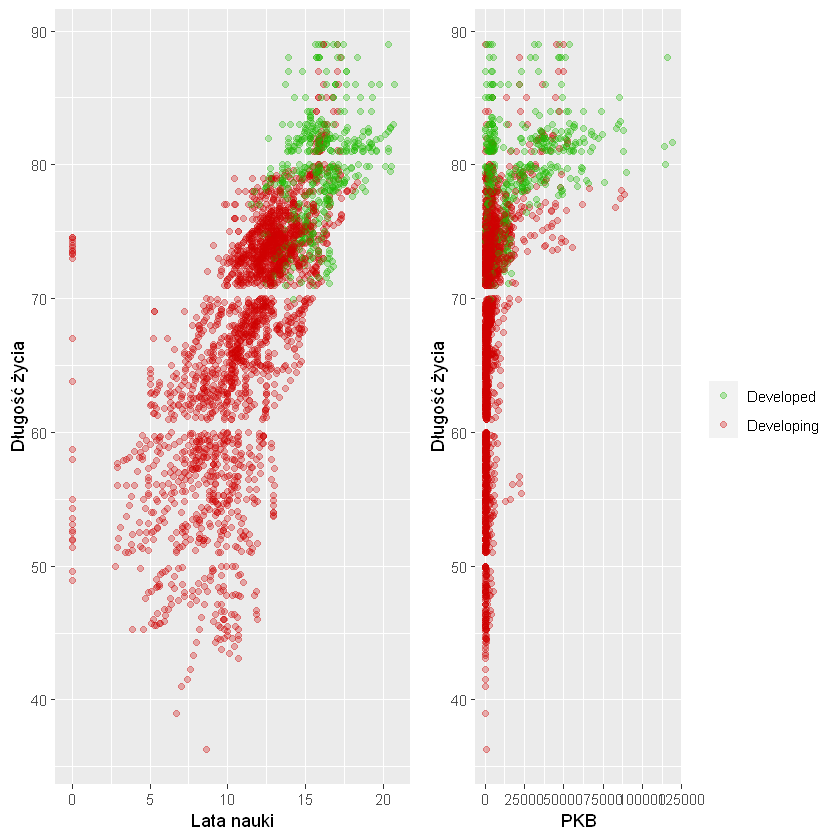

In [95]:
plt1 <- ggplot() + geom_point(aes(data$schooling, data$life_expectancy, col=data$status), alpha=0.3) +
scale_color_manual(values=c('#1cb900', '#ce0000')) + xlab("Lata nauki") + ylab("Długość życia") + theme(legend.position='none')

plt2 <- ggplot() + geom_point(aes(data$GDP, data$life_expectancy, col=data$status), alpha=0.3) +
scale_color_manual(values=c('#1cb900', '#ce0000')) + xlab("PKB") + ylab("Długość życia") + labs(col="")

plot_grid(plt1, plt2)

# Korelacja

Warning message:
"Removed 2693 rows containing missing values (`geom_point()`)."


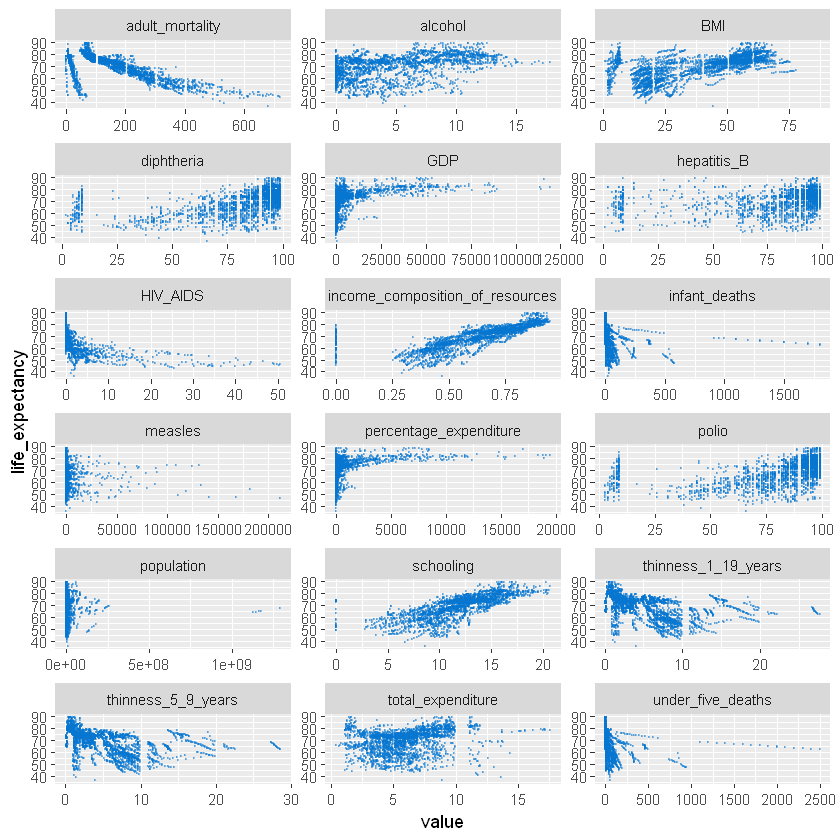

In [ ]:
data[4:22] %>%
  gather(-life_expectancy, key = "var", value = "value") %>% 
  ggplot(aes(x = value, y = life_expectancy)) +
    geom_point(size=0.4, alpha=0.4, col='#0575d0', stroke=0) +
    facet_wrap(~ var, scales='free', nrow=6)

In [98]:
correlations <- data.frame()
years <- sort(unique(data$year))
for (y in years) {
    data_year <- data %>% filter(year == y)
    rs <- c()
    for (column in colnames(data_year[5:22])) {
        r <- cor(data_year$life_expectancy, data_year[column], use="pairwise.complete.obs", method="spearman")
        rs <- append(rs, round(r, 2))
    }
    correlations <- rbind(correlations, rs)
}
correlations <- cbind(years, correlations)
names(correlations) <- colnames(data[c(2, 5:22)])
df <- data.frame(t(correlations), header=TRUE)
names(df) <- lapply(df[1, ], as.character)
df <- df[-1,1:16]
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
adult_mortality,-0.56,-0.57,-0.58,-0.54,-0.74,-0.54,-0.59,-0.61,-0.78,-0.71,-0.71,-0.72,-0.67,-0.69,-0.73,-0.74
infant_deaths,-0.58,-0.61,-0.62,-0.61,-0.62,-0.61,-0.62,-0.61,-0.61,-0.60,-0.59,-0.60,-0.59,-0.58,-0.58,-0.58
alcohol,0.43,0.41,0.44,0.43,0.44,0.44,0.46,0.45,0.45,0.43,0.44,0.44,0.57,0.56,0.59,0.20
percentage_expenditure,0.52,0.49,0.53,0.54,0.51,0.54,0.53,0.49,0.46,0.51,0.49,0.46,0.51,0.45,0.42,0.00
hepatitis_B,0.14,0.18,0.30,0.35,0.32,0.34,0.33,0.36,0.39,0.36,0.38,0.33,0.33,0.39,0.42,0.47
measles,-0.45,-0.46,-0.45,-0.39,-0.26,-0.20,-0.27,-0.22,-0.14,-0.21,-0.26,-0.15,-0.20,-0.20,-0.21,-0.23
BMI,0.60,0.64,0.65,0.60,0.56,0.48,0.61,0.62,0.60,0.61,0.55,0.55,0.55,0.53,0.51,0.55
under_five_deaths,-0.61,-0.63,-0.63,-0.63,-0.63,-0.62,-0.63,-0.63,-0.62,-0.63,-0.62,-0.63,-0.62,-0.60,-0.60,-0.60
polio,0.58,0.57,0.57,0.59,0.49,0.49,0.51,0.50,0.53,0.43,0.52,0.50,0.52,0.54,0.53,0.56


# GDP

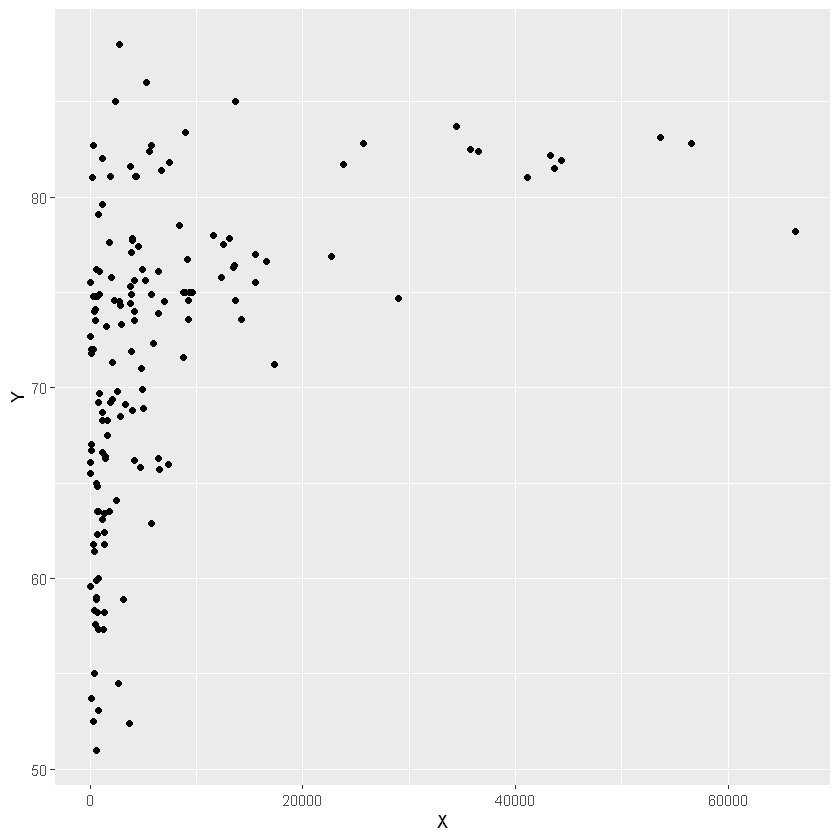

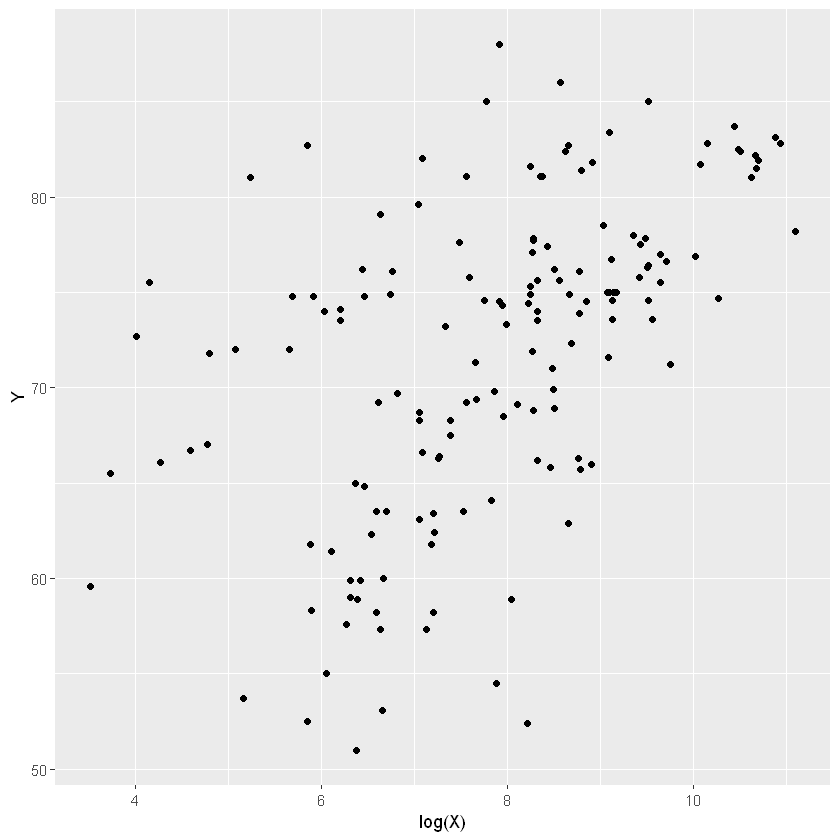

In [6]:
data_filtered <- data2015[!is.na(data2015$GDP) & !is.na(data2015$life_expectancy),]
X <- data_filtered$GDP
Y <- data_filtered$life_expectancy

ggplot() + geom_point(aes(X, Y))
ggplot() + geom_point(aes(log(X), Y))

In [7]:
cor(log(X), Y)

[1] 0.5208085

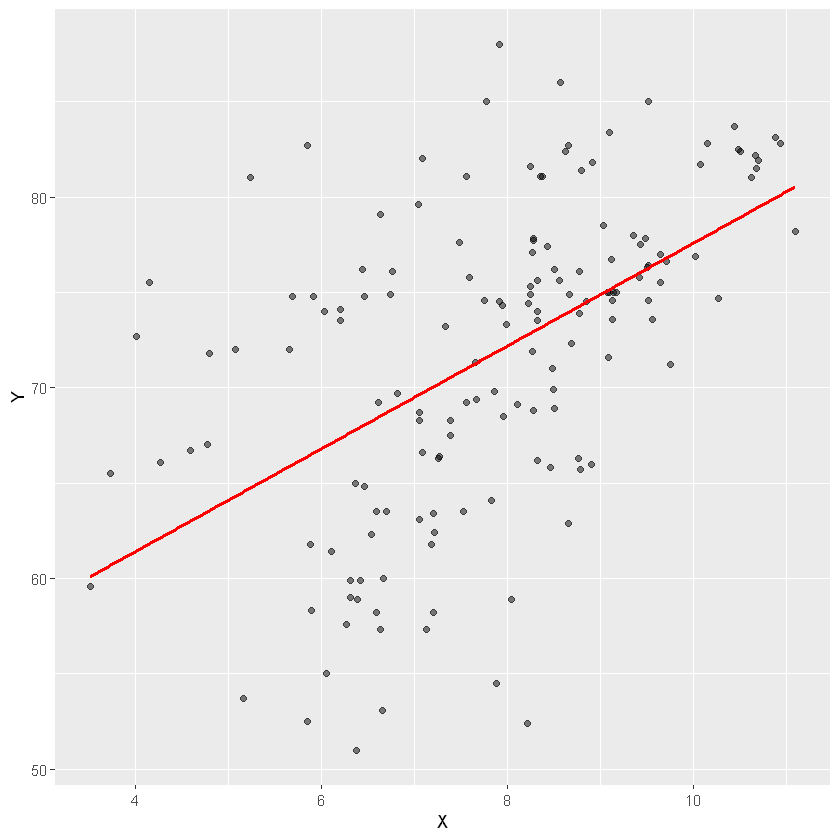

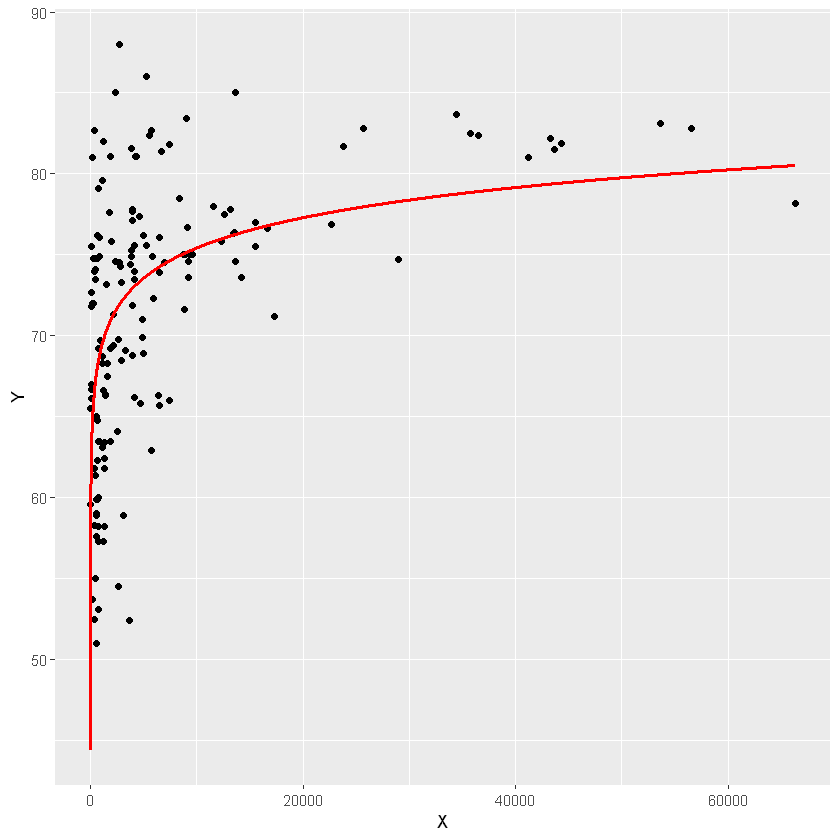

In [9]:
c(a, b) %<-% regression(log(X), Y)
xs <- seq(0.1, max(X), 10)
ggplot() + geom_point(aes(X, Y)) + geom_line(aes(xs, a*log(xs) + b), col='red', linewidth=1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


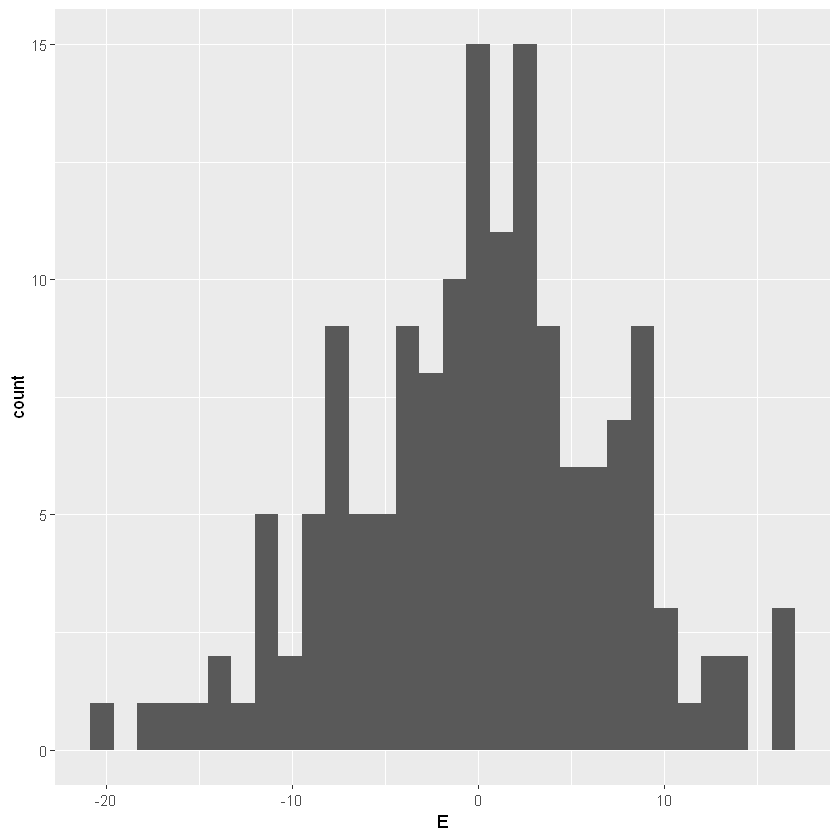

In [12]:
E <- Y - a*log(X) - b
ggplot() + geom_histogram(aes(E))

In [46]:
ks.test(E, 'pnorm', 0, sd(E))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  E
D = 0.045116, p-value = 0.9126
alternative hypothesis: two-sided


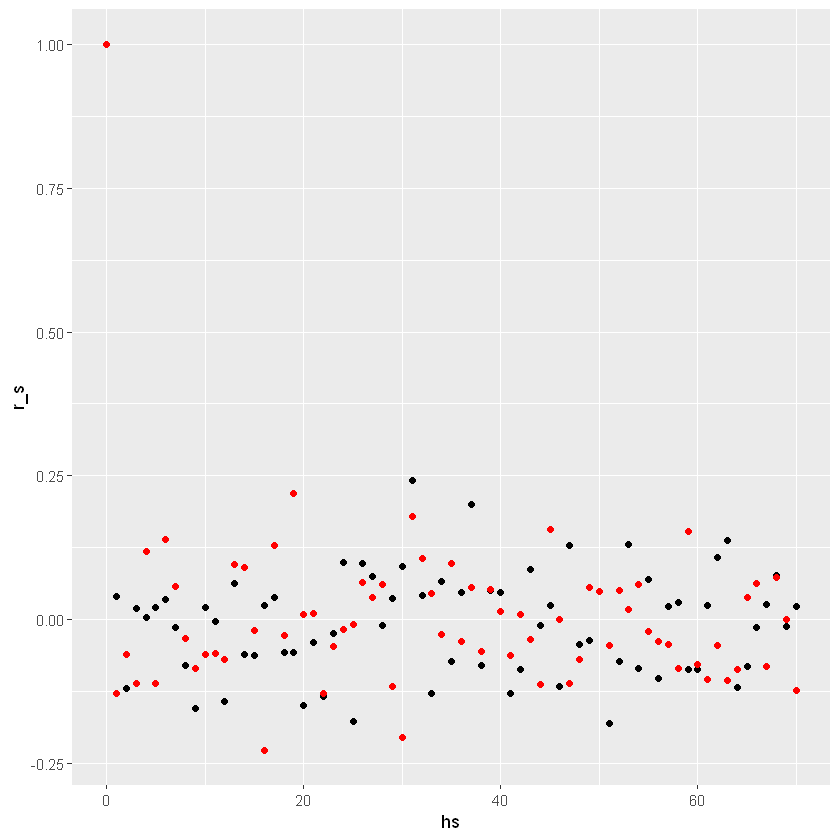

In [82]:
n <- length(E)
hs <- 0:70
Xt <- rnorm(n, 0, sd(E))

g_ <- function(X, h) {
    return ( mean( (X[(1+h):n] - mean(X)) * (X[1:(n-h)] - mean(X)) ) )
}

g_s <- c()
g_s2 <- c()
for (h in hs) {
    g_s <- append(g_s, g_(E, h))
    g_s2 <- append(g_s2, g_(Xt, h))
}

r_s = g_s / g_(E, 0)
r_s2 = g_s2 / g_(Xt, 0)

ggplot() + geom_point(aes(hs, r_s)) + geom_point(aes(hs, r_s2), col='red')

# HIV

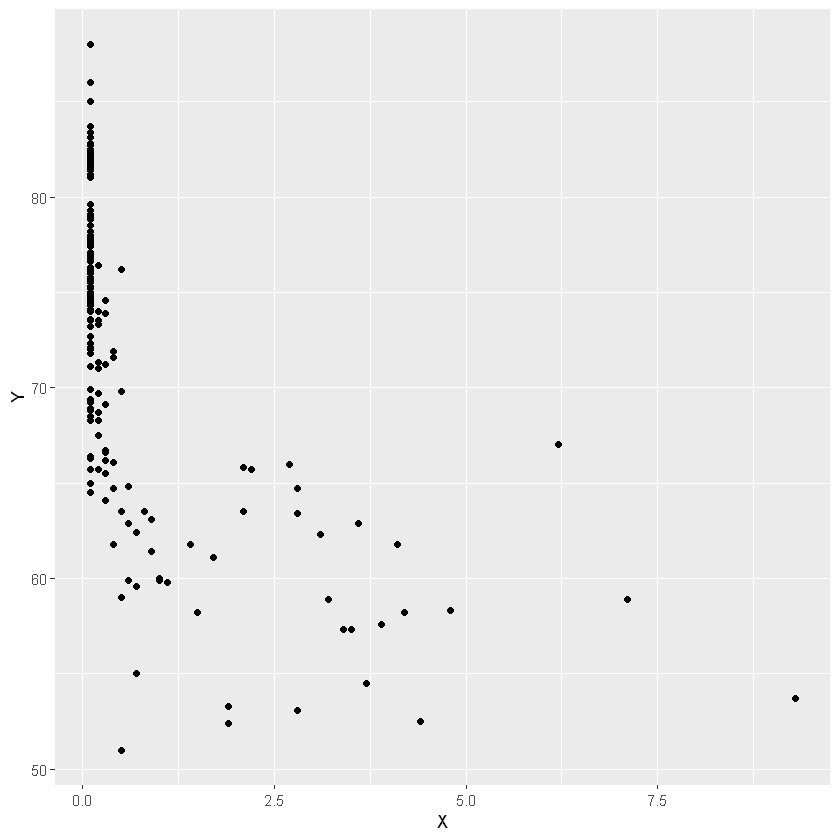

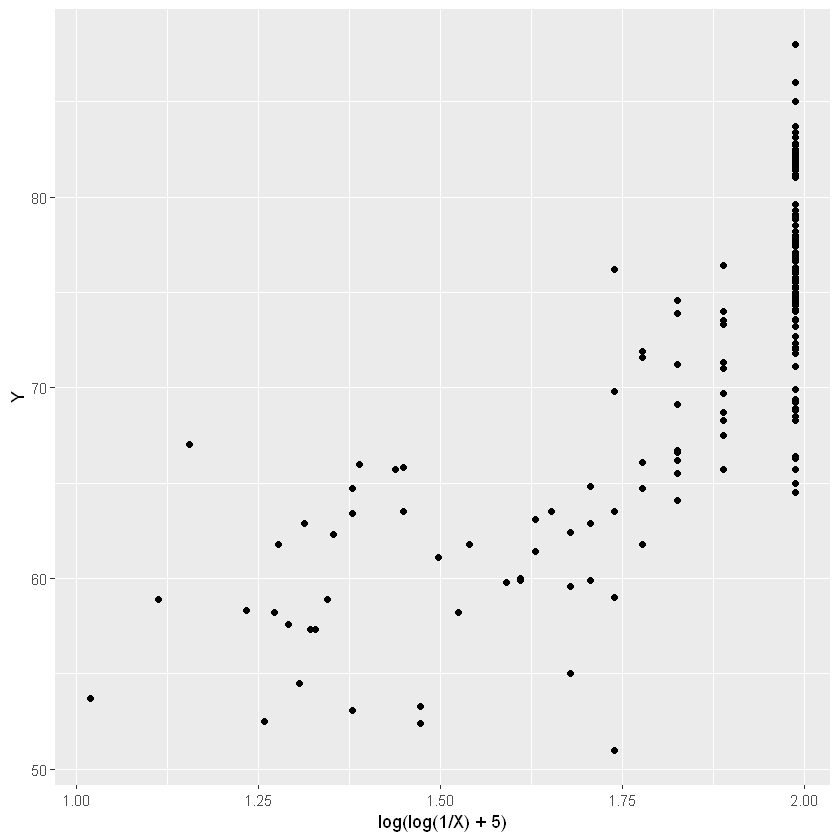

In [28]:
data_filtered <- data2015[!is.na(data2015$HIV_AIDS) & !is.na(data2015$life_expectancy),]
X <- data_filtered$HIV_AIDS
Y <- data_filtered$life_expectancy

ggplot() + geom_point(aes(X, Y))
ggplot() + geom_point(aes(log(log(1/X)+5), Y))

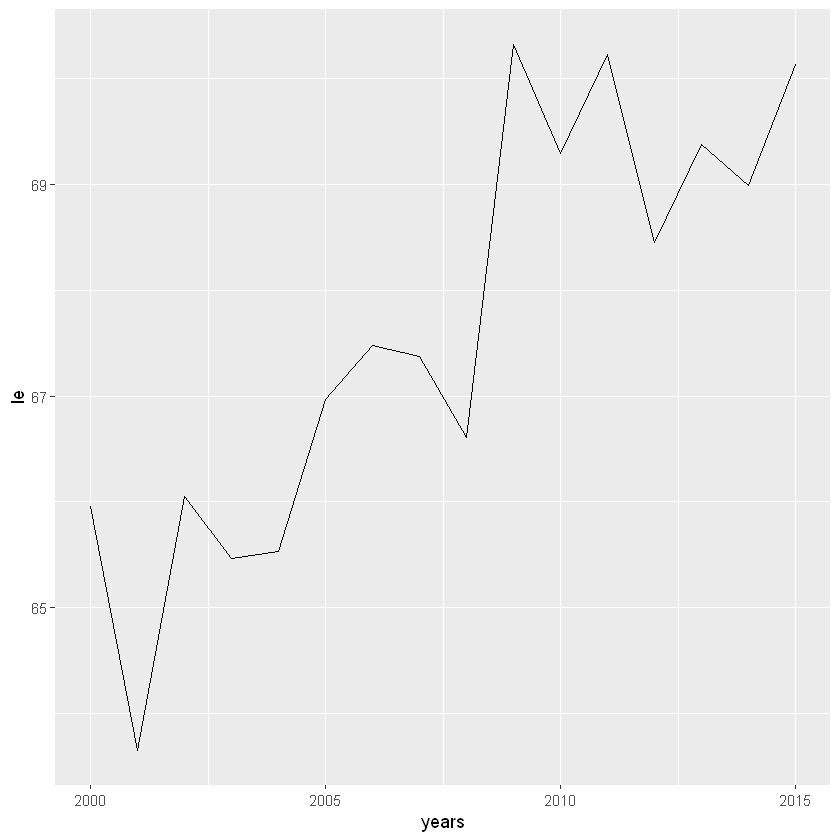

In [15]:
le <- c()
years <- sort(unique(data$year))

for (y in years) {
    data_year <- data %>% filter(year == y & !is.na(life_expectancy) & !is.na(population))
    mean_lf <- sum(data_year$life_expectancy * data_year$population) / sum(data_year$population)
    le <- append(le, mean_lf)
}

ggplot() + geom_line(aes(x=years, y=le))

[1]    0.3644112 -663.9382578

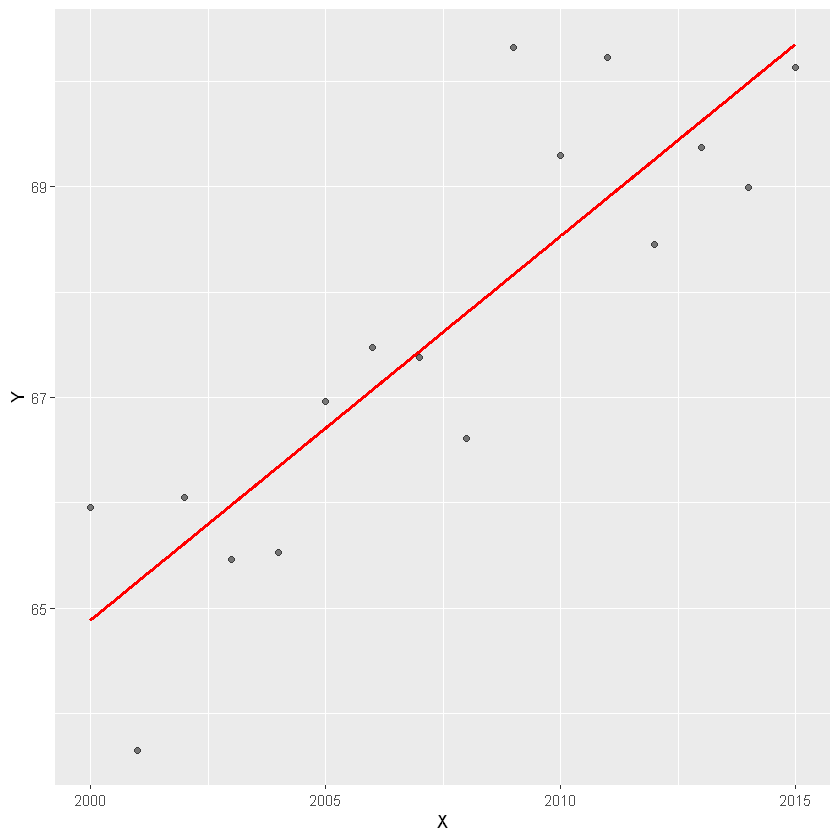

In [16]:
regression(years, le)

[1] "Pearson"           "0.404876761126602"
[1] "Spearman"          "0.442504524305733"


Warning message:
"Removed 203 rows containing missing values (`geom_point()`)."


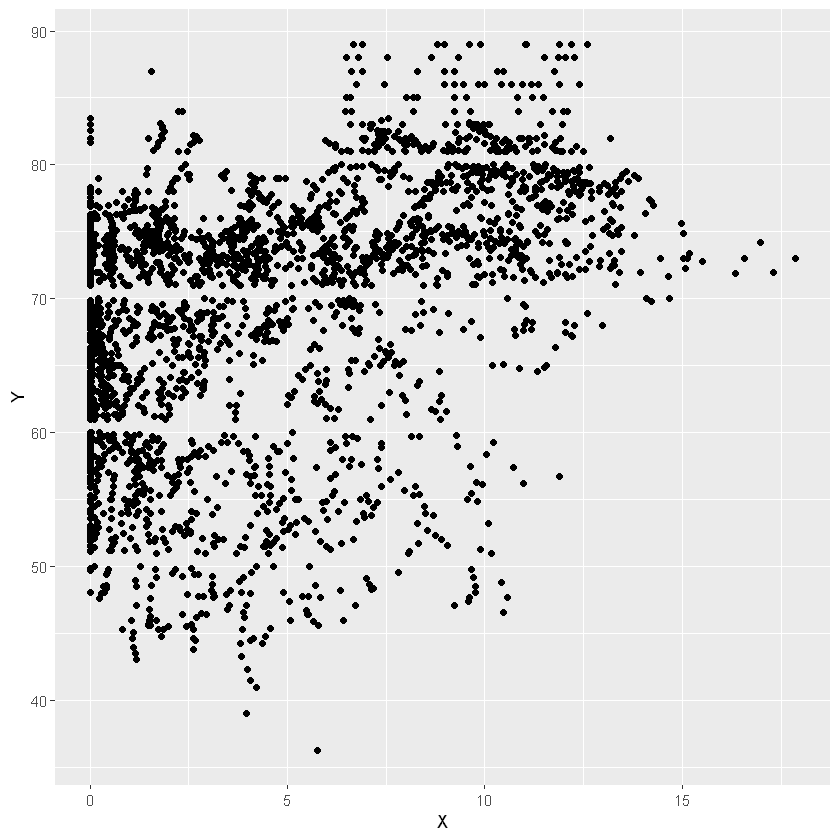

In [17]:
analysis(data$alcohol, data$life_expectancy)

[1] "Pearson"            "-0.556556253400693"
[1] "Spearman"           "-0.753641880116125"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


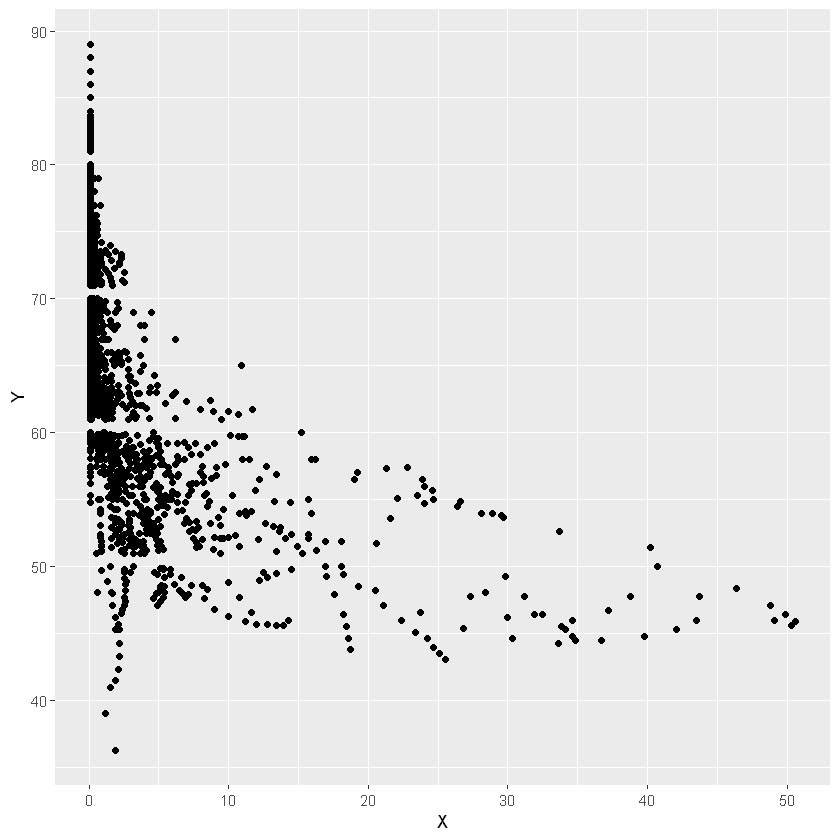

In [18]:
analysis(data$HIV_AIDS, data$life_expectancy)

[1] "Pearson"           "0.461455192620738"
[1] "Spearman"          "0.642470938054315"


Warning message:
"Removed 453 rows containing missing values (`geom_point()`)."


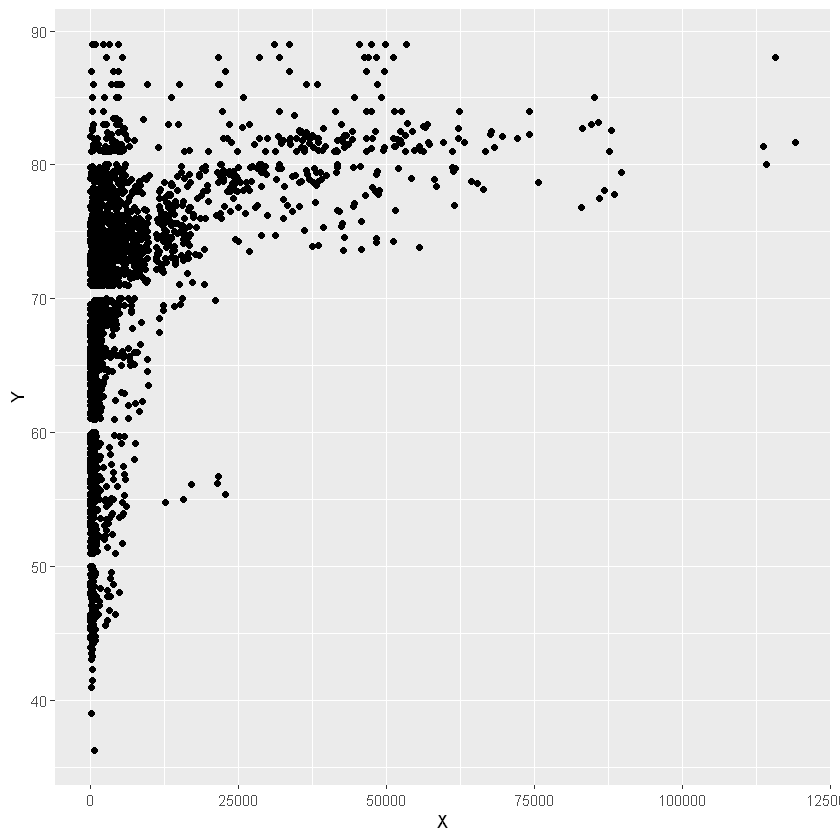

In [19]:
analysis(data$GDP, data$life_expectancy)

[1] "Pearson"            "-0.696359313769976"
[1] "Spearman"           "-0.650006967892821"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


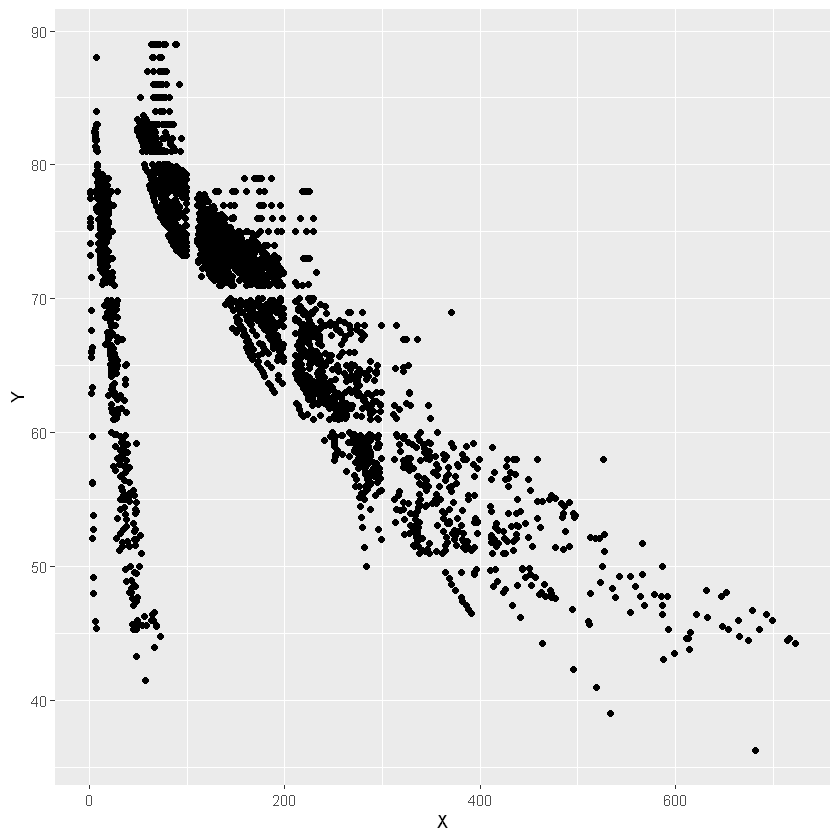

In [20]:
analysis(data$adult_mortality, data$life_expectancy)

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 630 rows containing missing values (`geom_line()`)."


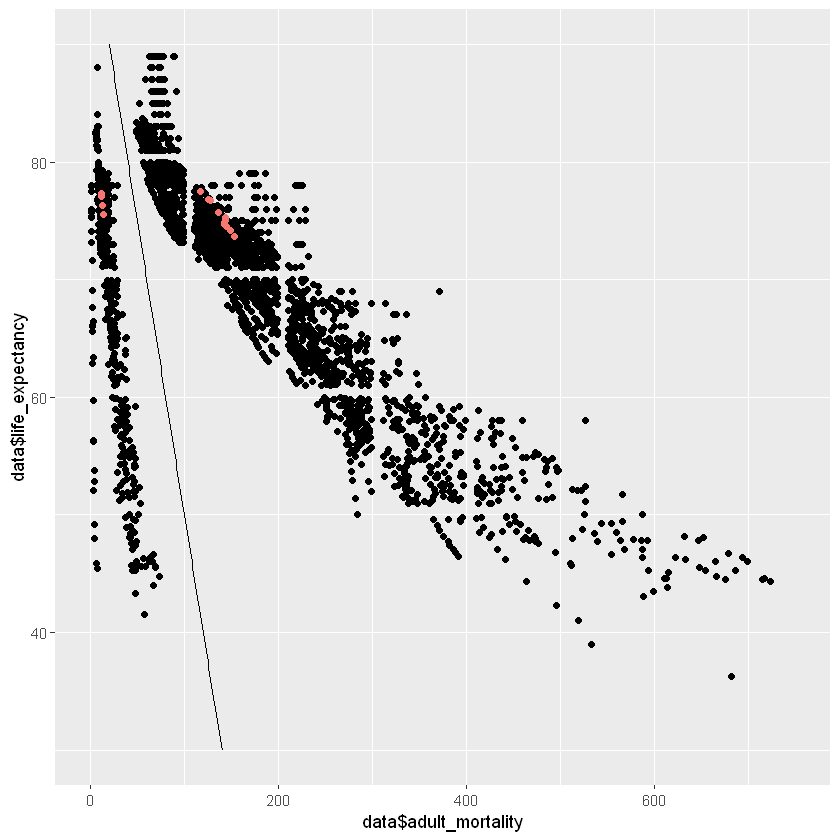

In [21]:
xs <- seq(0, 750, 1)
a <- -0.5
b <- 100
ys <- a * xs + b
ggplot() +
    geom_point(aes(data$adult_mortality, data$life_expectancy)) +
    geom_point(aes(poland$adult_mortality, poland$life_expectancy, col='red')) +
    geom_line(aes(xs, ys)) +
    ylim(30, 90) +
    theme(legend.position='none')

Warning message:
"Use of `data$type` is discouraged.
i Use `type` instead."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


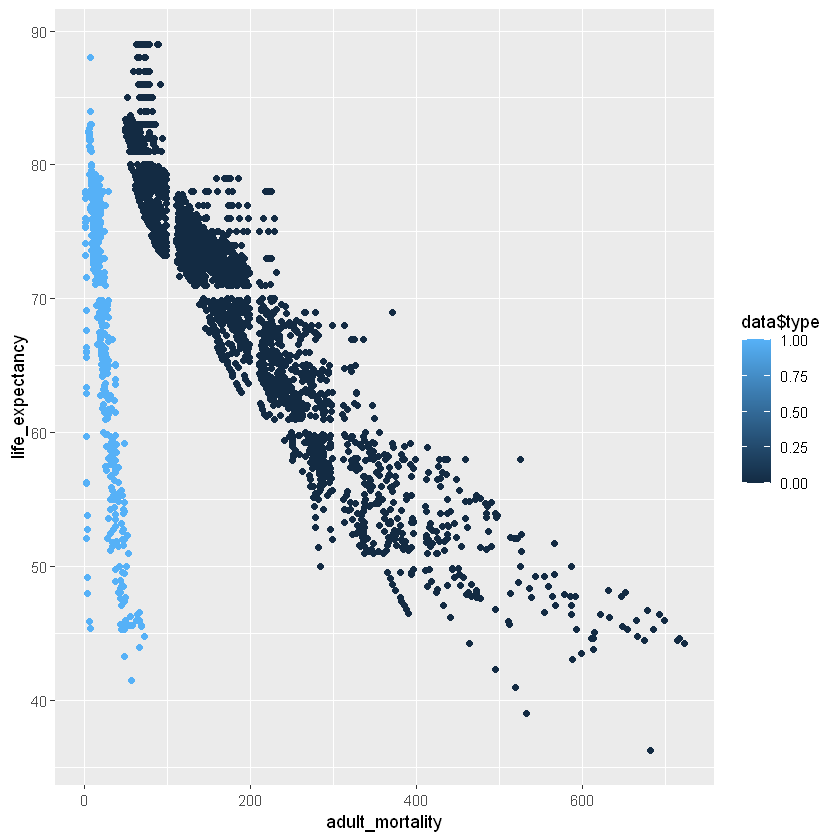

In [22]:
data$type <- 0
data$type[data$life_expectancy < a * data$adult_mortality + b] <- 1
ggplot(data, aes(x=adult_mortality, y=life_expectancy, col=data$type)) + geom_point()

Warning message:
"Removed 10 rows containing non-finite values (`stat_bin()`)."


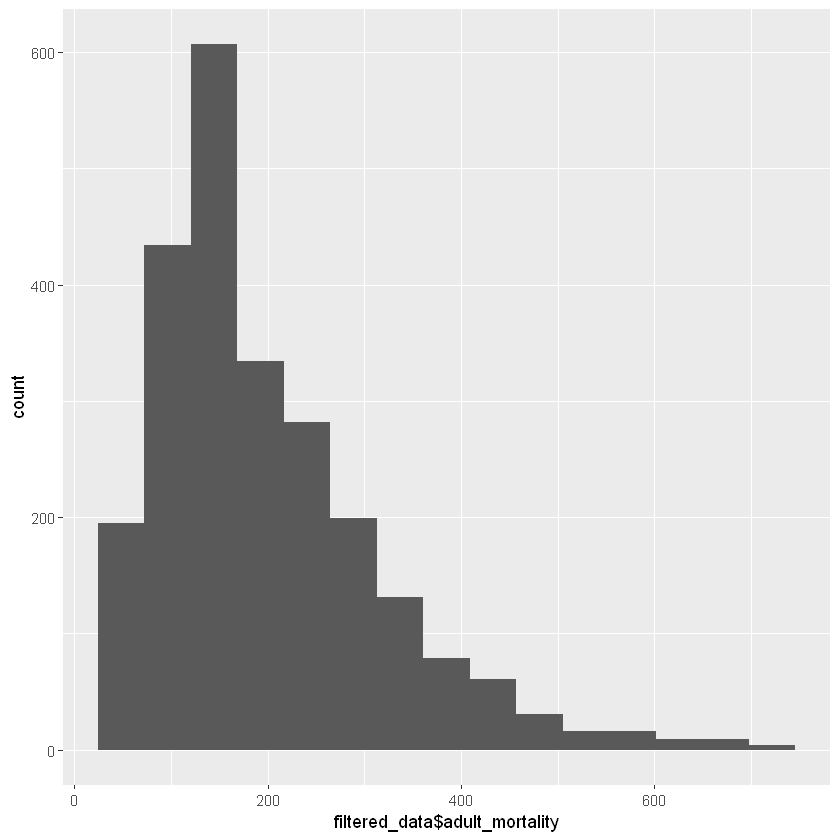

In [23]:
filtered_data <- data %>% filter(type == 0)
ggplot() + geom_histogram(aes(filtered_data$adult_mortality), bins=15)

In [24]:
data %>% filter(type == 1)

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,...,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,type
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,...,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2002,Developing,56.2,3,88,0.01,16.887351,64,2486,...,7.76,36,0.1,187.84595,21979923,19.9,2.2,0.341,6.2,1
Albania,2014,Developing,77.5,8,0,4.51,428.749067,98,0,...,5.88,98,0.1,4575.76379,288914,1.2,1.3,0.761,14.2,1
Albania,2008,Developing,75.3,1,1,5.61,36.622068,99,0,...,5.87,99,0.1,437.53965,2947314,1.6,1.6,0.713,12.0,1
Albania,2007,Developing,75.9,9,1,5.58,32.246552,98,22,...,6.10,98,0.1,363.13685,29717,1.6,1.7,0.703,11.6,1
Albania,2005,Developing,73.5,15,1,5.16,26.993121,98,6,...,6.12,98,0.1,279.14293,311487,1.8,1.8,0.685,10.8,1
Albania,2004,Developing,73.0,17,1,4.54,221.842800,99,7,...,6.38,97,0.1,2416.58824,326939,1.8,1.9,0.681,10.9,1
Albania,2003,Developing,72.8,18,1,4.29,14.719289,97,8,...,6.27,97,0.1,189.68156,339616,1.9,2.0,0.674,10.7,1
Albania,2002,Developing,73.3,15,1,3.73,104.516916,96,16,...,6.30,98,0.1,1453.64278,3511,2.0,2.1,0.670,10.7,1
Albania,2001,Developing,73.6,14,1,4.25,96.205571,96,18,...,6.00,97,0.1,1326.97339,36173,2.1,2.1,0.662,10.6,1


[1] "Pearson"           "0.301557394491553"
[1] "Spearman"          "0.481300846443494"


Warning message:
"Removed 472 rows containing missing values (`geom_point()`)."


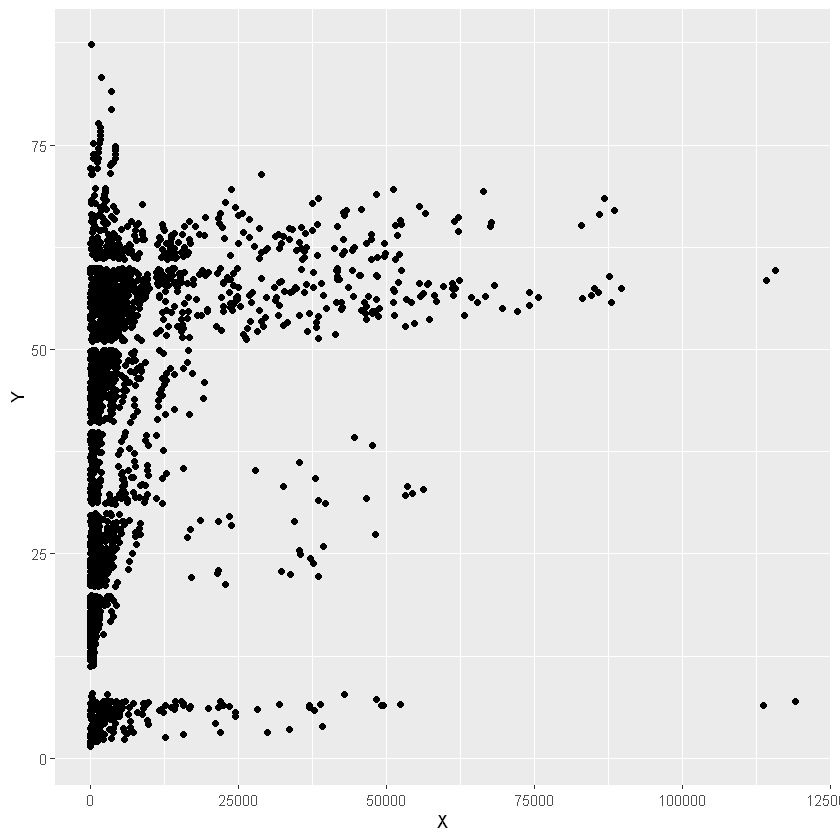

In [25]:
analysis(data$GDP, data$BMI)

[1] "Pearson"           "0.751975462736698"
[1] "Spearman"          "0.813541004769093"


Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."


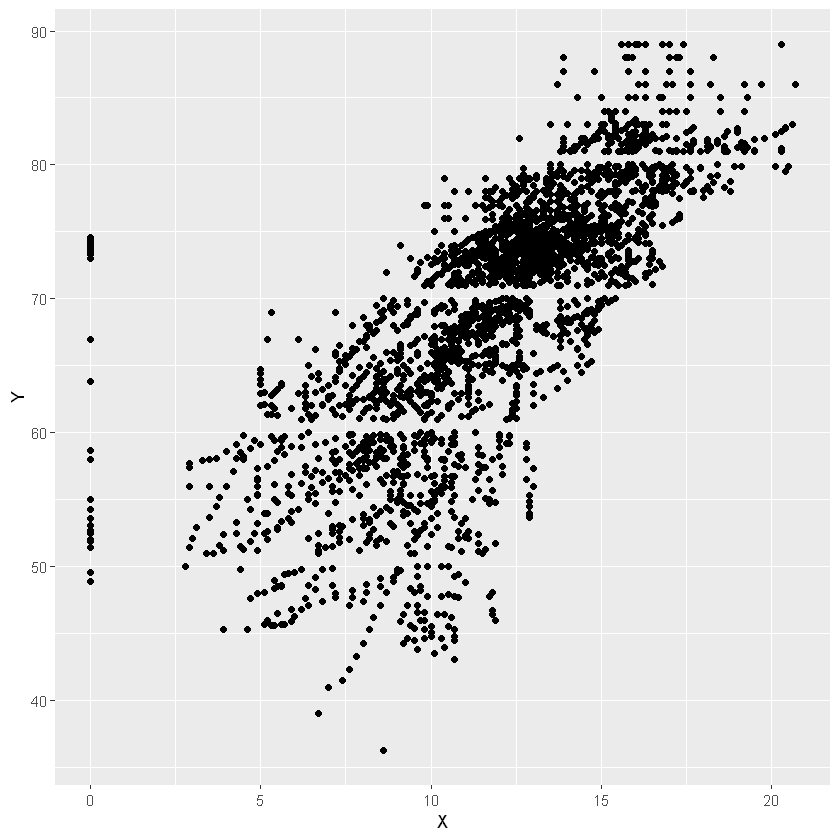

In [26]:
analysis(data$schooling, data$life_expectancy)

[1] "Pearson"           "0.448272829450722"
[1] "Spearman"          "0.665285017917609"


Warning message:
"Removed 451 rows containing missing values (`geom_point()`)."


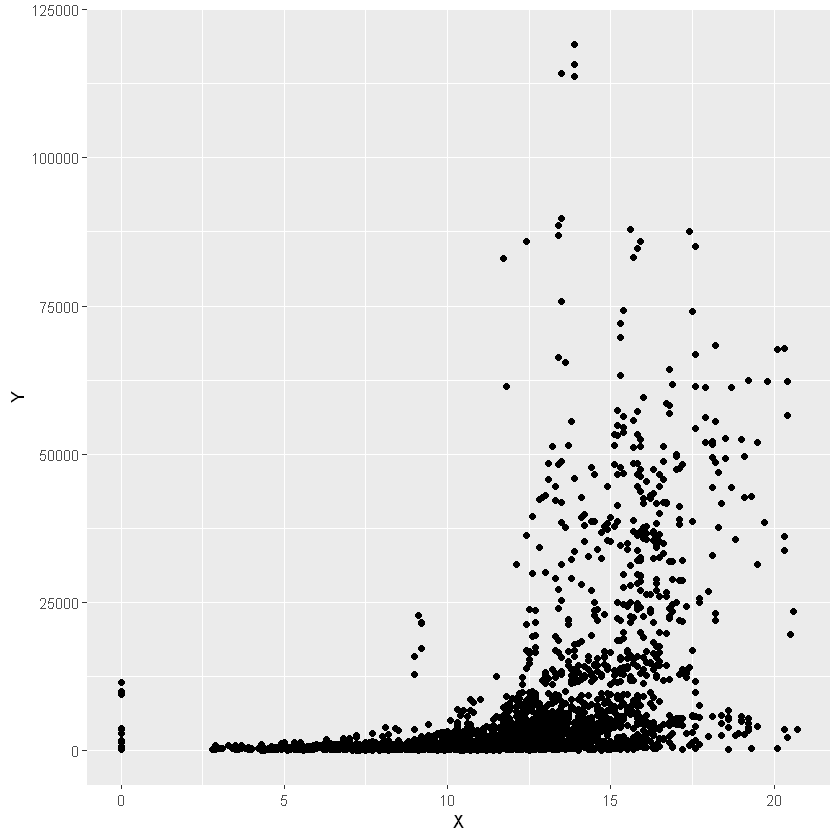

In [27]:
analysis(data$schooling, data$GDP)

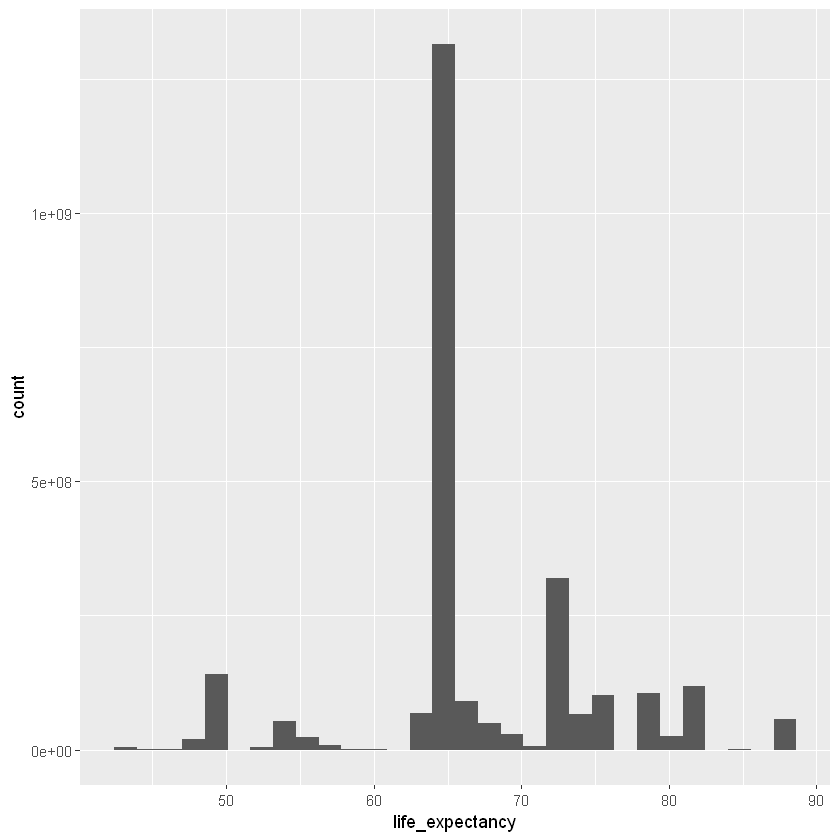

In [28]:
ggplot(data[data$year == 2005,], aes(life_expectancy, weight=population)) + geom_histogram(bins=30)

[1] "Pearson"           "0.907363860239579"
[1] "Spearman"          "0.905150749344808"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


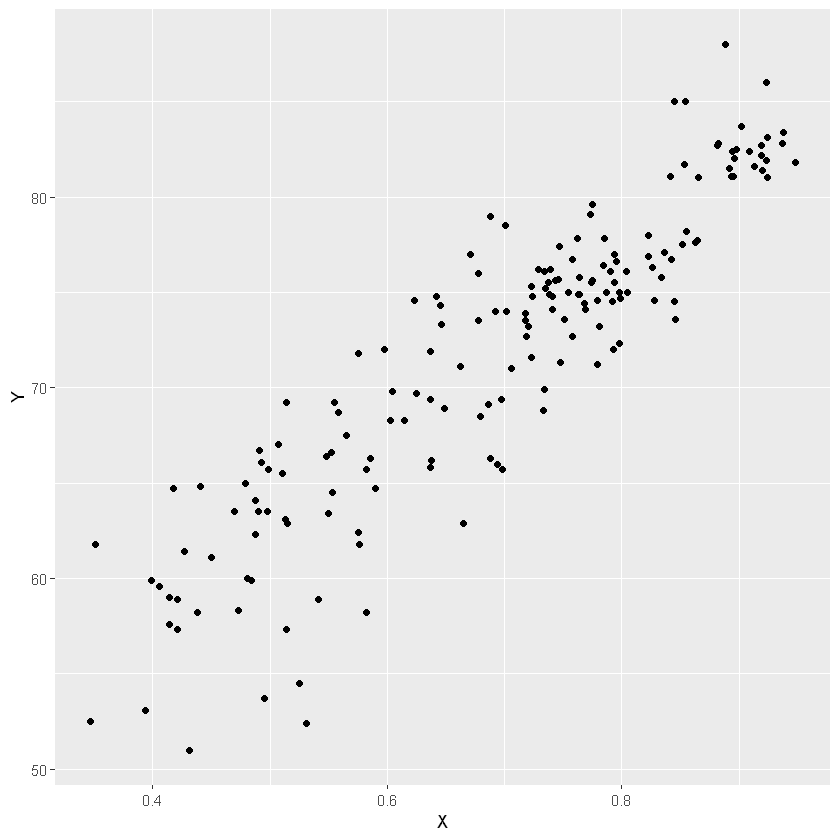

In [29]:
analysis(data2015$income_composition_of_resources, data2015$life_expectancy)

[1] "Pearson"           "0.818159436788872"
[1] "Spearman"          "0.844347924774132"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


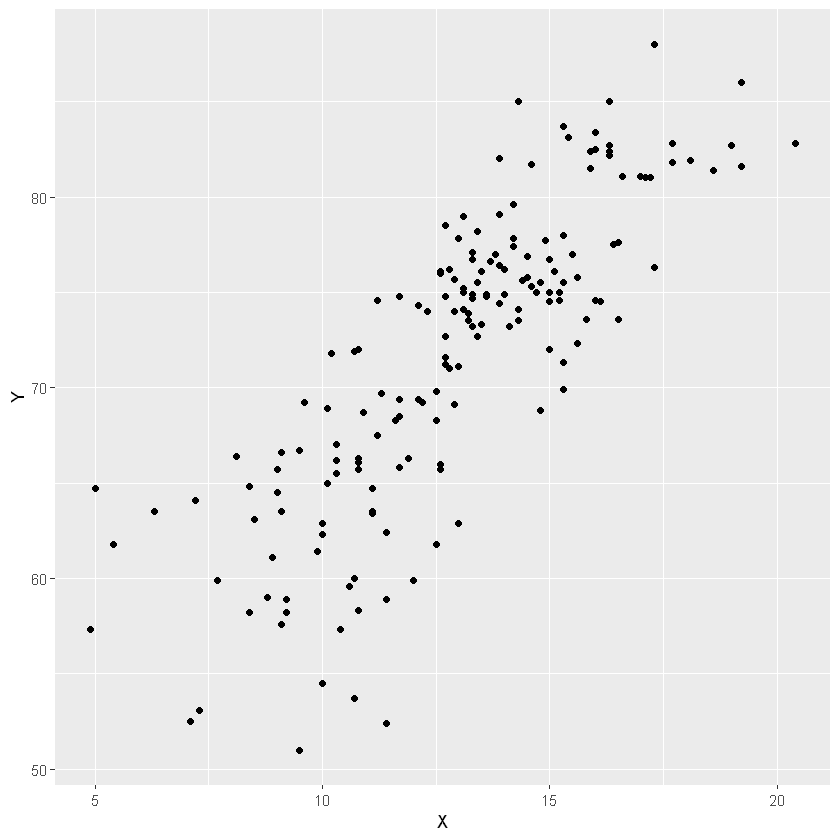

In [30]:
analysis(data2015$schooling, data2015$life_expectancy)

[1] "Pearson"            "-0.608344937357291"
[1] "Spearman"           "-0.777014609759447"


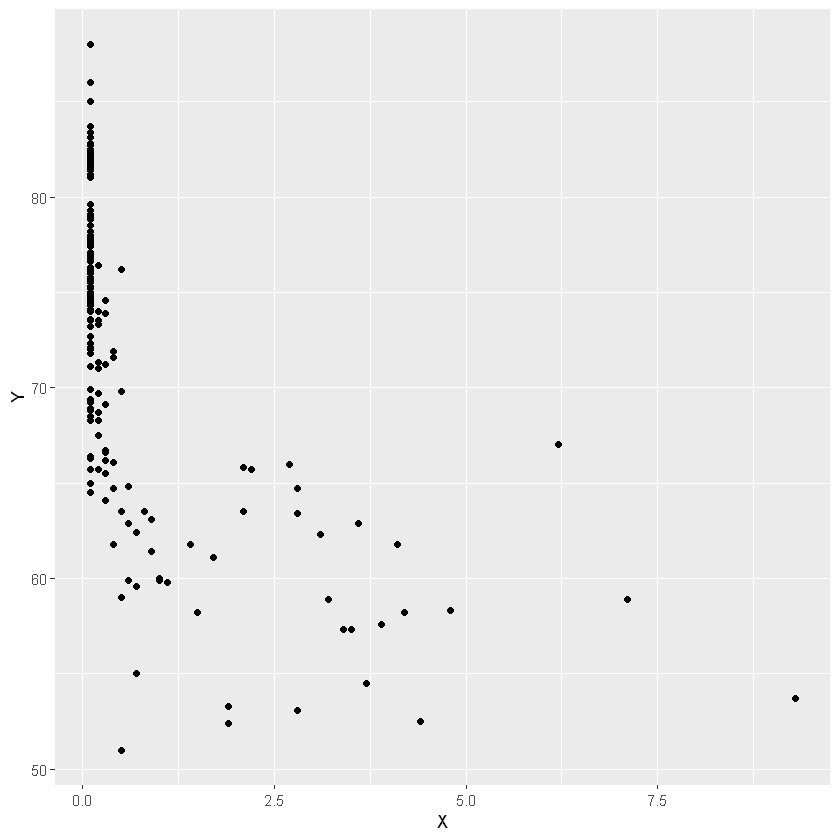

In [31]:
analysis(data2015$HIV_AIDS, data2015$life_expectancy)

[1] "Pearson"           "0.454491013399891"
[1] "Spearman"          "0.567500961689245"


Warning message:
"Removed 29 rows containing missing values (`geom_point()`)."


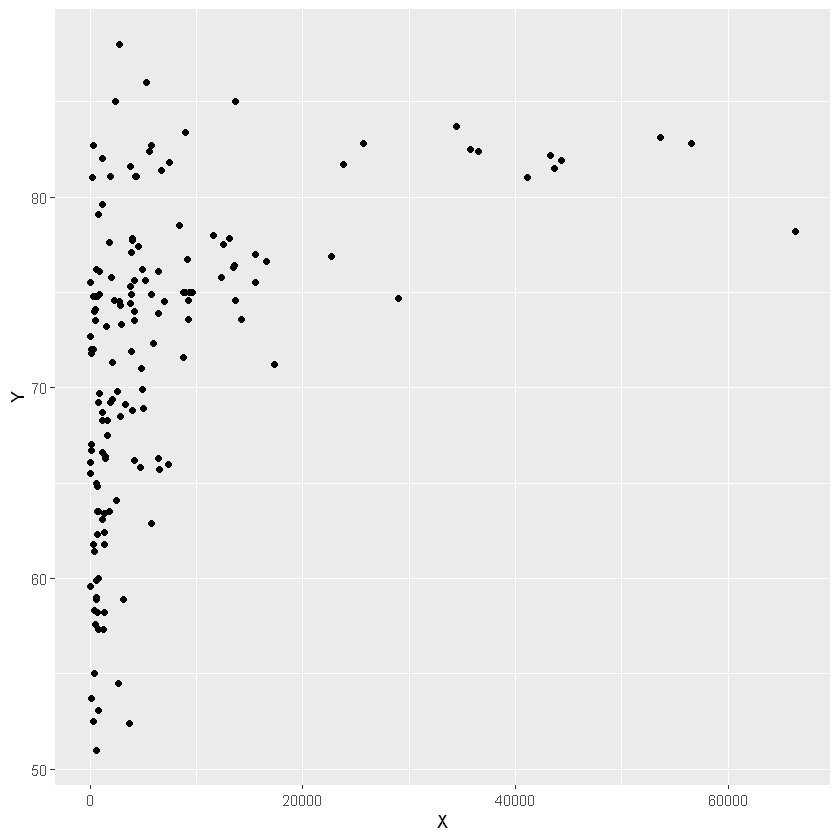

In [32]:
analysis(data2015$GDP, data2015$life_expectancy)

# Polska

In [7]:
poland

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,⋯,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Poland,2015,Developed,77.5,117,2,NA,0.000000,96,0,⋯,92,NA,98,0.1,12565.9876,37986412,1.9,2.0,0.852,16.4
Poland,2014,Developed,77.3,12,2,10.71,243.808475,96,0,⋯,94,6.35,98,0.1,14341.6750,3811735,1.9,2.1,0.850,16.4
Poland,2013,Developed,77.1,12,2,11.63,23.435335,96,84,⋯,95,6.40,99,0.1,1378.5491,384196,2.0,2.1,0.838,15.4
Poland,2012,Developed,76.8,125,2,10.81,230.040097,97,71,⋯,95,6.62,99,0.1,13145.1484,3863164,2.0,2.1,0.834,15.3
Poland,2011,Developed,76.7,128,2,10.93,250.077378,98,0,⋯,96,6.70,99,0.1,13893.1877,3863255,2.0,2.2,0.829,15.4
Poland,2010,Developed,76.3,13,2,10.59,220.491685,98,13,⋯,96,6.88,99,0.1,12599.5249,3842794,2.1,2.2,0.822,15.1
Poland,2009,Developed,75.7,136,2,10.70,1299.159757,98,115,⋯,96,7.12,99,0.1,11527.5932,3815163,2.1,2.3,0.818,15.1
Poland,2008,Developed,75.5,14,2,11.40,15.714748,98,0,⋯,96,6.88,99,0.1,141.4469,38125759,2.2,2.3,0.813,15.0
Poland,2007,Developed,75.3,144,2,10.90,14.304245,98,40,⋯,99,6.28,99,0.1,1126.3185,381256,2.2,2.4,0.808,15.0


In [8]:
data2015 %>% filter(country == "Poland")

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,⋯,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Poland,2015,Developed,77.5,117,2,NA,0,96,0,⋯,92,NA,98,0.1,12565.99,37986412,1.9,2,0.852,16.4


In [10]:
pol <- data2015 %>% filter(country == "Poland")
stats <- c()

for (column in colnames(data)) {
    F <- ecdf(data2015[column])
    stats <- append(stats, F(pol[column]))
}



Warning message in xtfrm.data.frame(x):
"cannot xtfrm data frames"


ERROR: Error in `[.data.frame`(x, order(x, na.last = na.last, decreasing = decreasing)): undefined columns selected


In [21]:
a <- c(1, 2, 3, 4, 5, 6)
h <- ecdf(a)

In [23]:
data2015[,"life_expectancy"]

[1] 65.0 77.8 75.6 52.4 76.4 76.3 74.8 82.8 81.5 72.7 76.1 76.9 71.8 75.5 72.3
 [16] 81.1 71.0 60.0 69.8 77.0 77.4 65.7 75.0 77.7 74.5 59.9 59.6 53.3 73.3 68.7
 [31] 57.3 82.2 52.5 53.1 85.0 76.1 74.8 63.5 64.7 79.6 78.0 79.1 85.0 78.8 76.0
 [46] 59.8 86.0 63.5 73.9 76.2 79.0 73.5 58.2 64.7 77.6 64.8 69.9 81.1 82.4 66.0
 [61] 61.1 74.4 81.0 62.4 81.0 73.6 71.9 59.0 58.9 66.2 63.5 74.6 75.8 82.7 68.3
 [76] 69.1 75.5 68.9 81.4 82.5 82.7 76.2 83.7 74.1 72.0 63.4 66.3 74.7 71.1 65.7
 [91] 74.6 74.9 53.7 61.4 72.7 73.6 82.0 65.5 58.3 75.0 78.5 58.2 81.7 63.1 74.6
[106] 76.7 69.4 68.8 76.1 74.3 57.6 66.6 65.8 69.2 81.9 81.6 74.8 61.8 54.5 81.8
[121] 76.6 66.4 77.8 62.9 74.0 75.5 68.5 77.5 81.1 78.2 82.3 72.1 75.0 75.0 66.1
[136] 75.2 73.2 74.0 67.5 74.5 66.7 75.6 73.2 51.0 83.1 76.7 88.0 69.2 55.0 62.9
[151] 57.3 82.8 74.9 64.1 71.6 58.9 82.4 83.4 64.5 69.7 74.9 75.7 68.3 59.9 73.5
[166] 71.2 75.3 75.8 66.3 62.3 71.3 77.1 81.2 61.8 79.3 77.0 69.4 72.0 74.1 76.0
[181] 65.7 61.8 67.0

In [25]:
xxx <- data2015[,"life_expectancy"]
F <- ecdf(xxx)

In [39]:
pol <- data2014 %>% filter(country == "Poland")
stats <- c()

for (column in colnames(data)[4:22]) {
    F <- ecdf(data2014[,column])
    stats <- append(stats, round(F(pol[column]), 2))
}

df <- data.frame(colnames(data)[4:22], stats)
colnames(df) <- c("a", "b")
df

a,b
<chr>,<dbl>
life_expectancy,0.77
adult_mortality,0.07
infant_deaths,0.50
alcohol,0.94
percentage_expenditure,0.60
hepatitis_B,0.73
measles,0.37
BMI,0.77
under_five_deaths,0.47


[1] "Pearson"           "0.991807943340656"
[1] "Spearman"          "0.997058823529412"


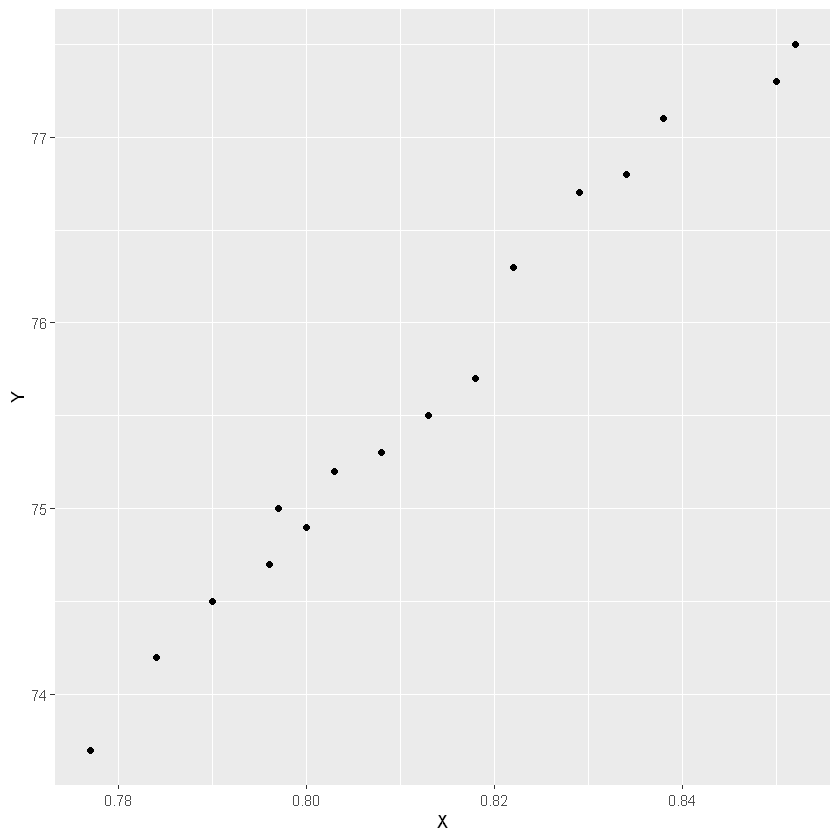

In [35]:
analysis(poland$income_composition_of_resources, poland$life_expectancy)

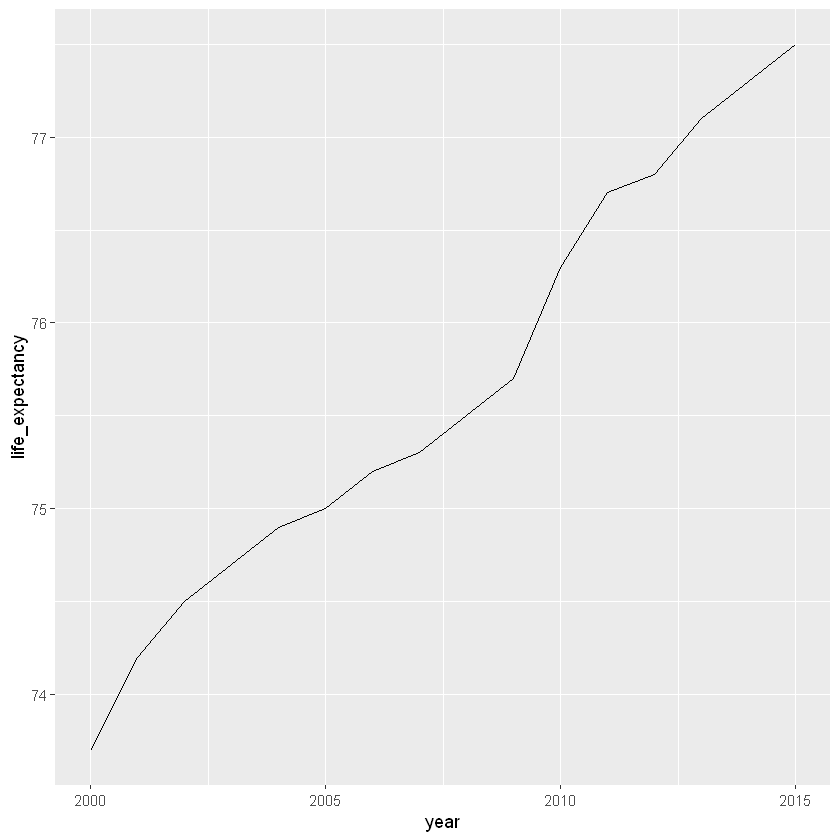

In [36]:
ggplot(poland, aes(x=year, y=life_expectancy)) + geom_line(show.legend = FALSE)

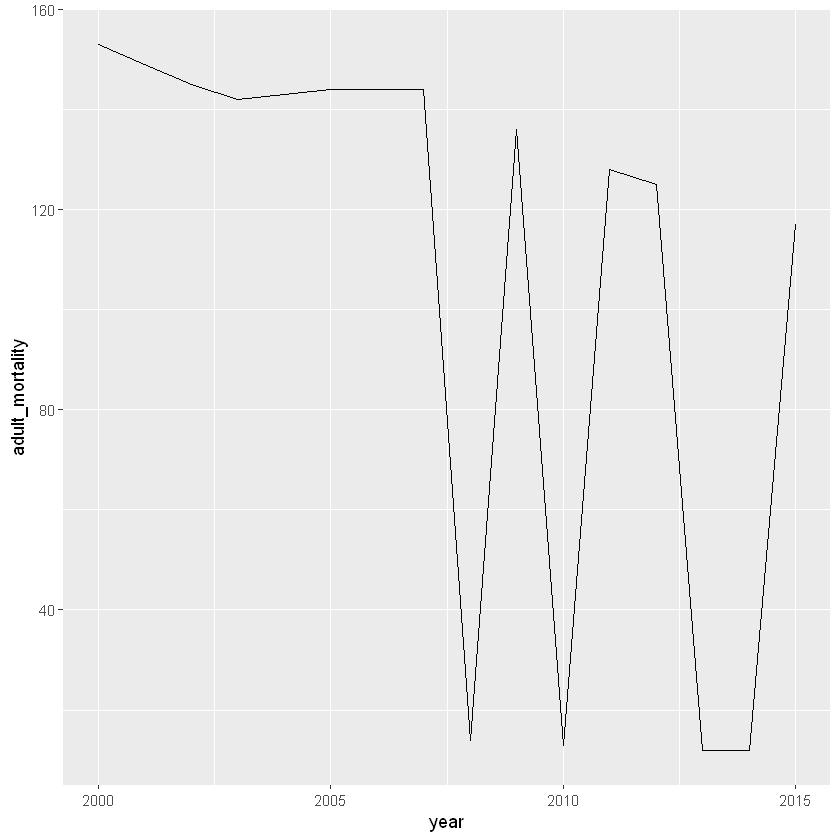

In [37]:
ggplot(poland, aes(x=year, y=adult_mortality)) + geom_line(show.legend = FALSE)

# Scattery

In [38]:
plt <- ggplot() + geom_point(aes(data[,"adult_mortality"]))
plt

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while setting up geom.
i Error occurred in the 1st layer.
Caused by error in `compute_geom_1()`:
! `geom_point()` requires the following missing aesthetics: y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_co

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


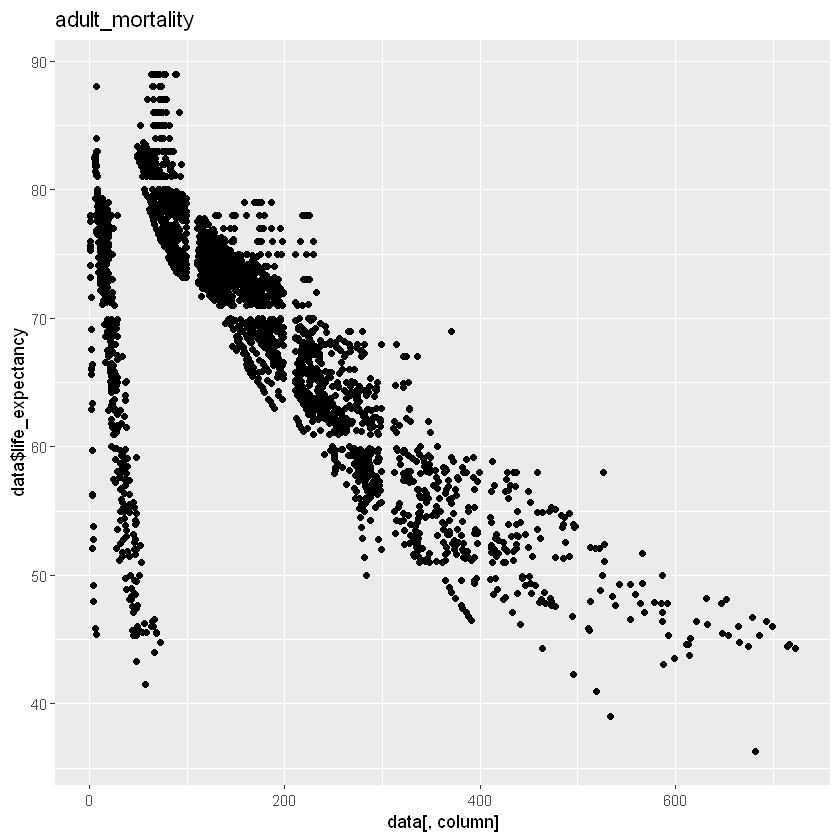

Warning message:
"Removed 203 rows containing missing values (`geom_point()`)."


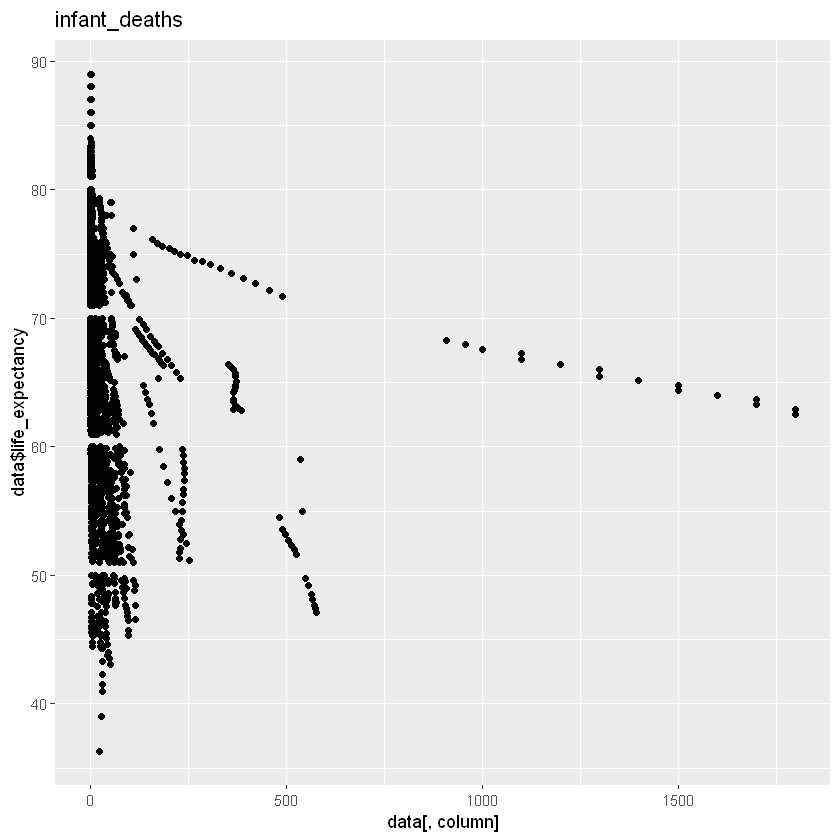

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


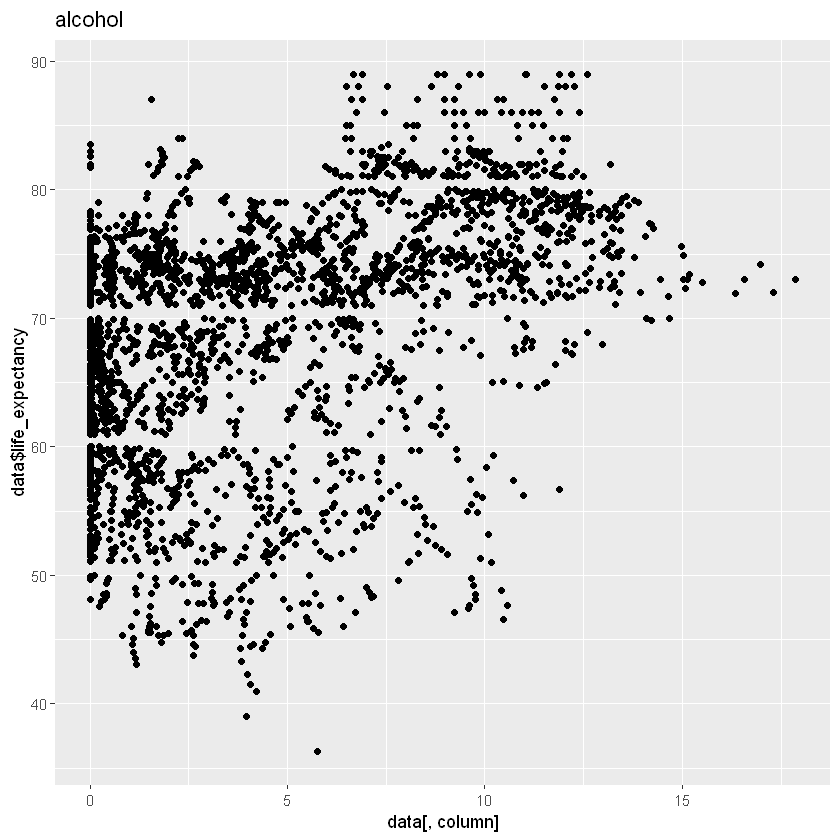

Warning message:
"Removed 563 rows containing missing values (`geom_point()`)."


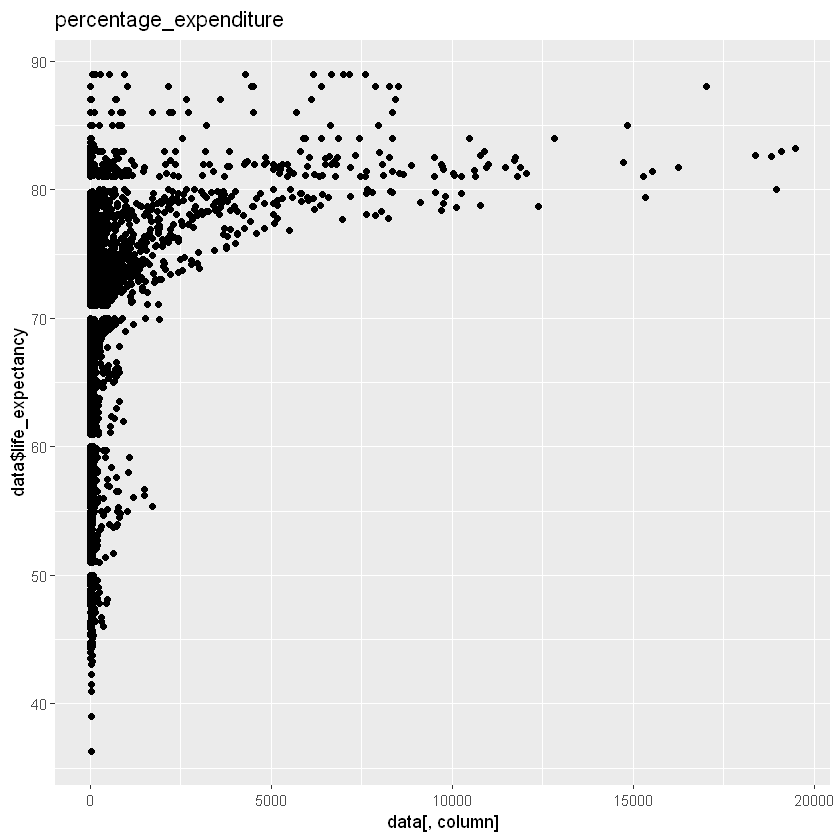

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


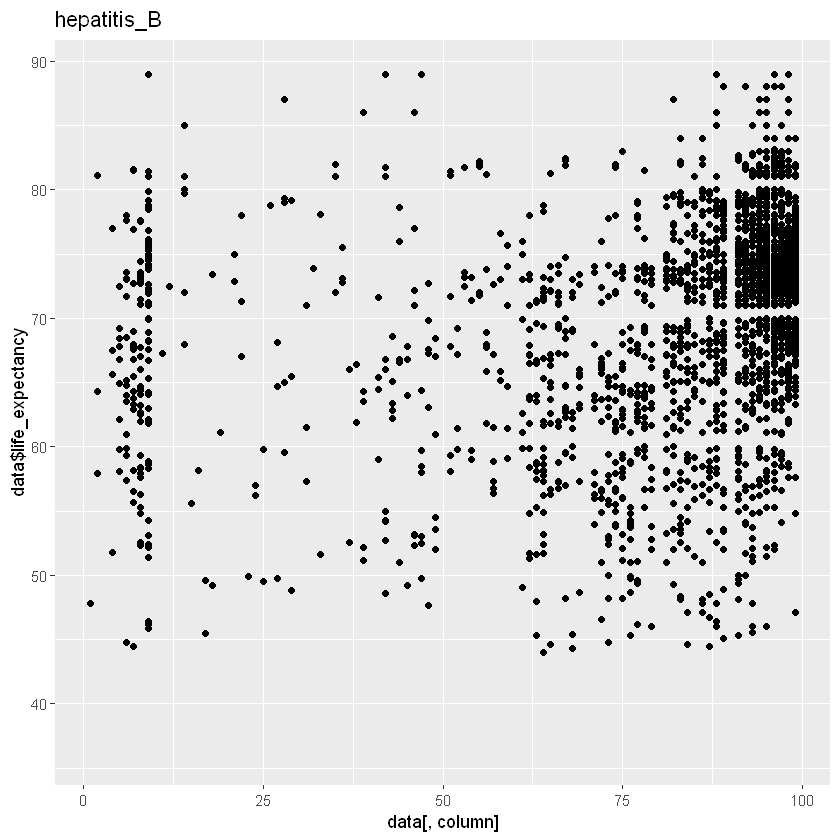

Warning message:
"Removed 42 rows containing missing values (`geom_point()`)."


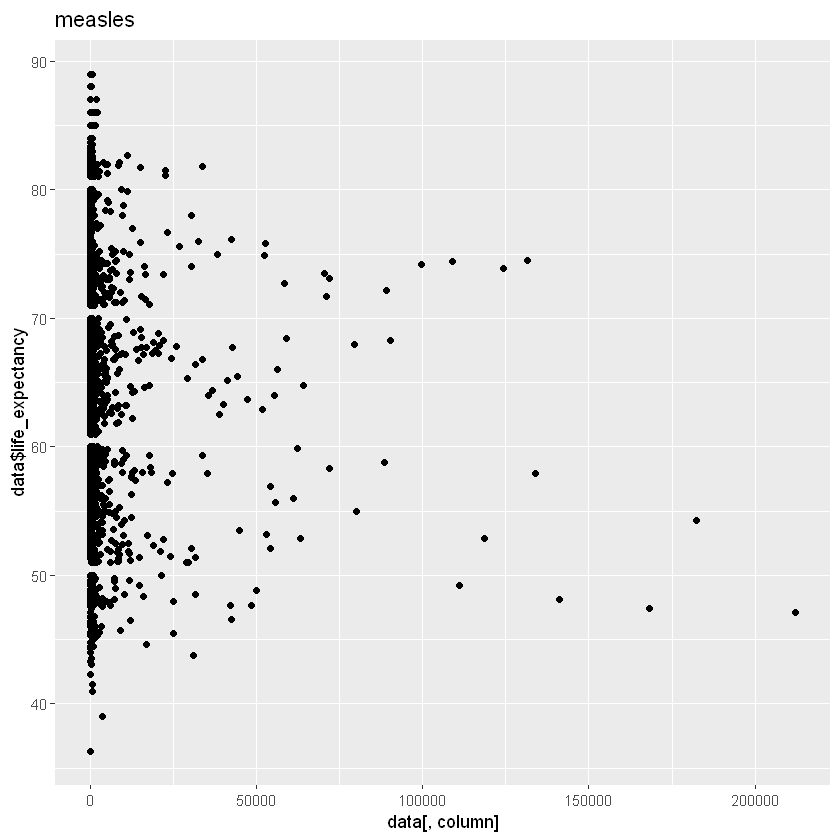

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


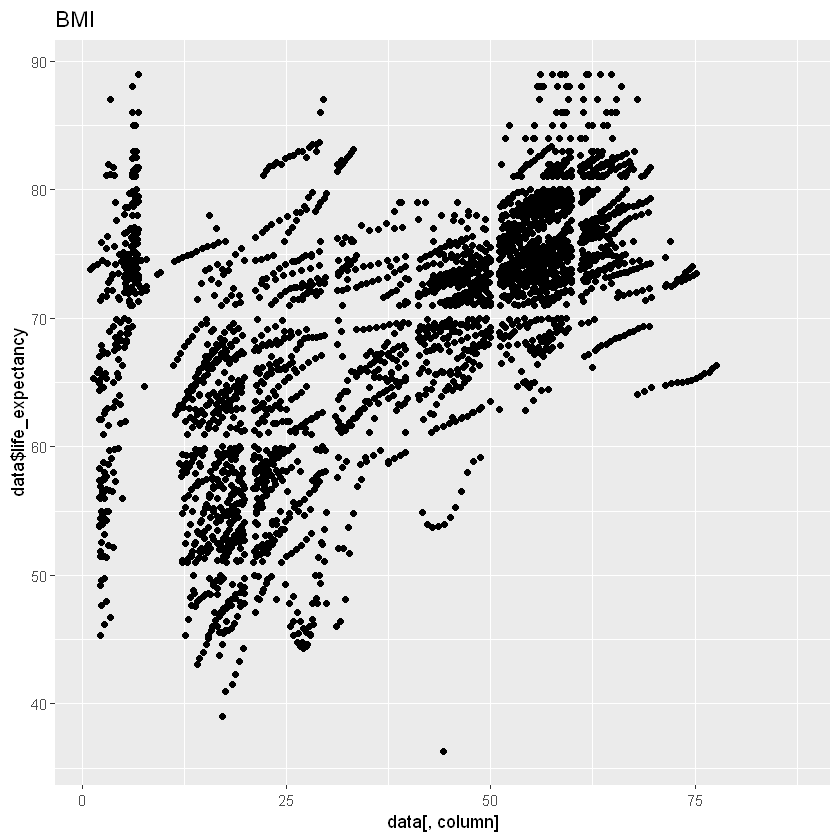

Warning message:
"Removed 29 rows containing missing values (`geom_point()`)."


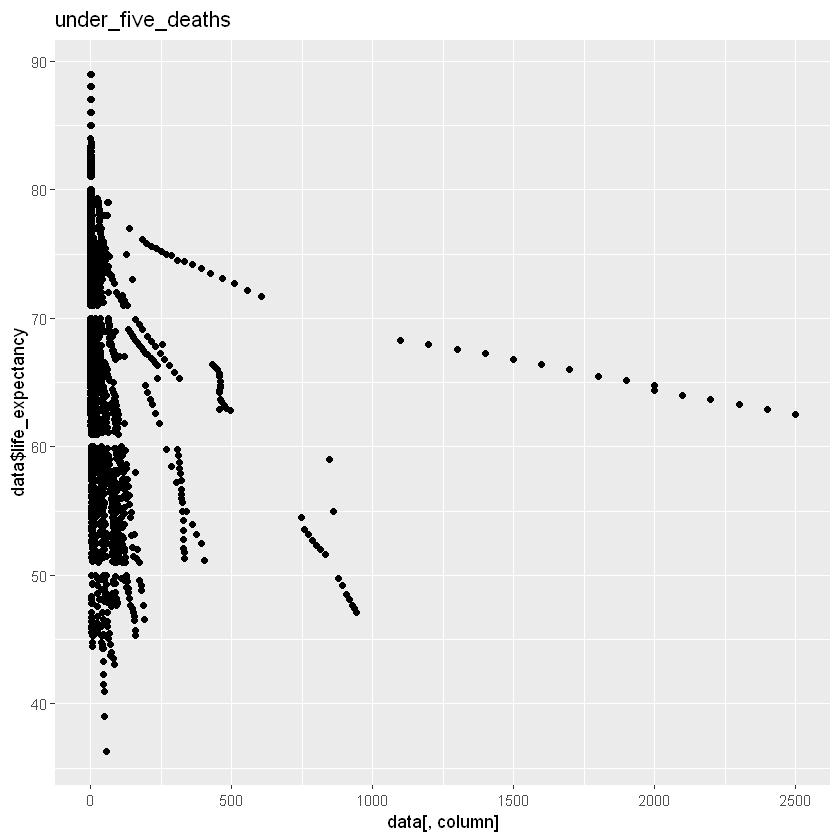

Warning message:
"Removed 236 rows containing missing values (`geom_point()`)."


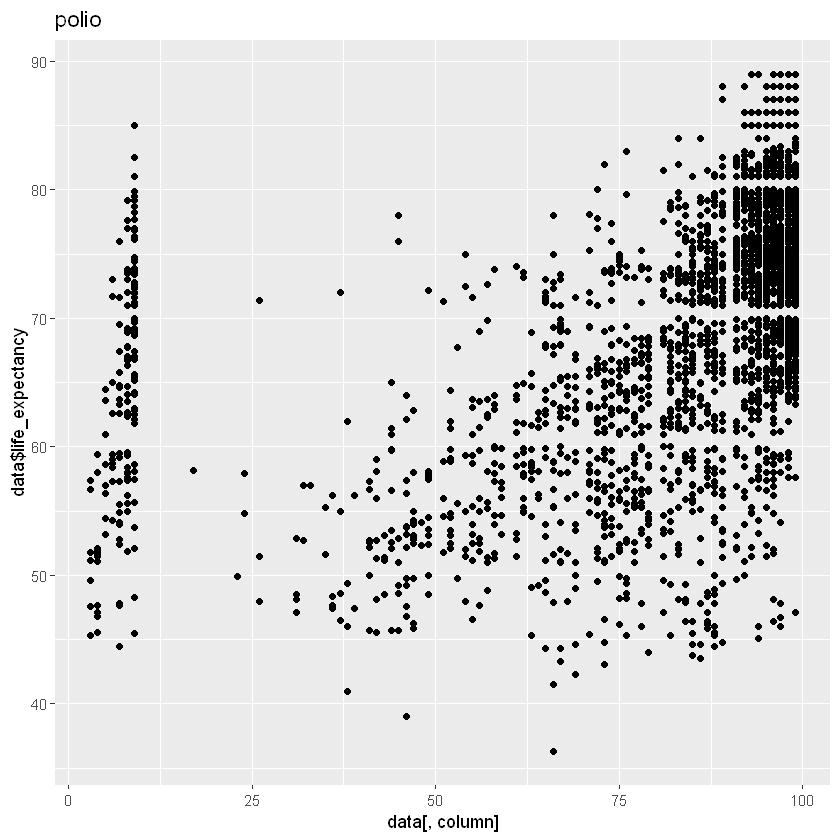

Warning message:
"Removed 29 rows containing missing values (`geom_point()`)."


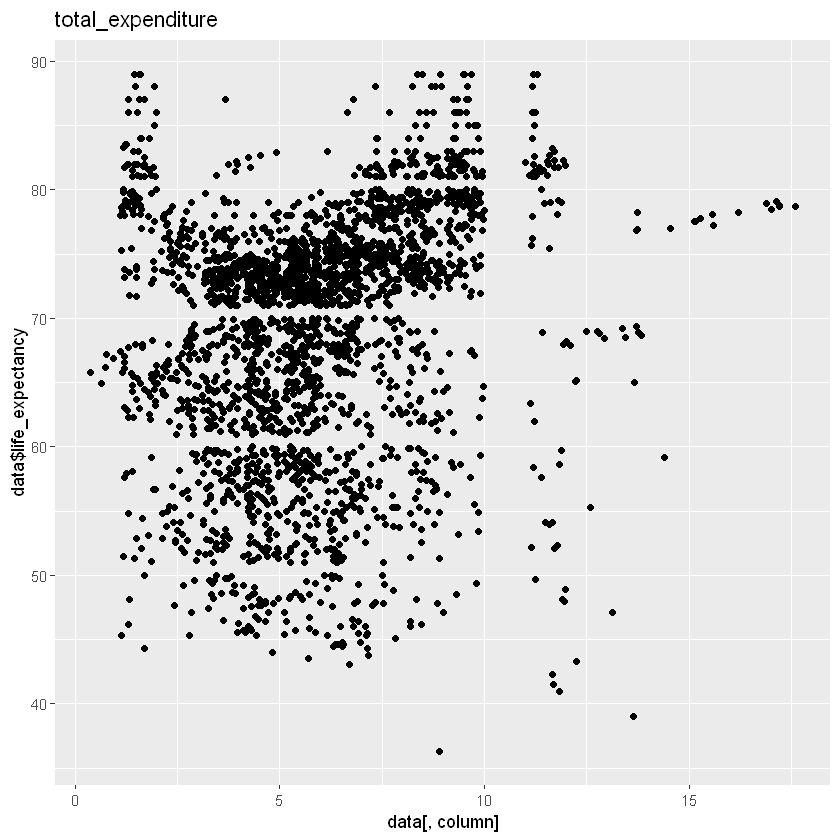

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


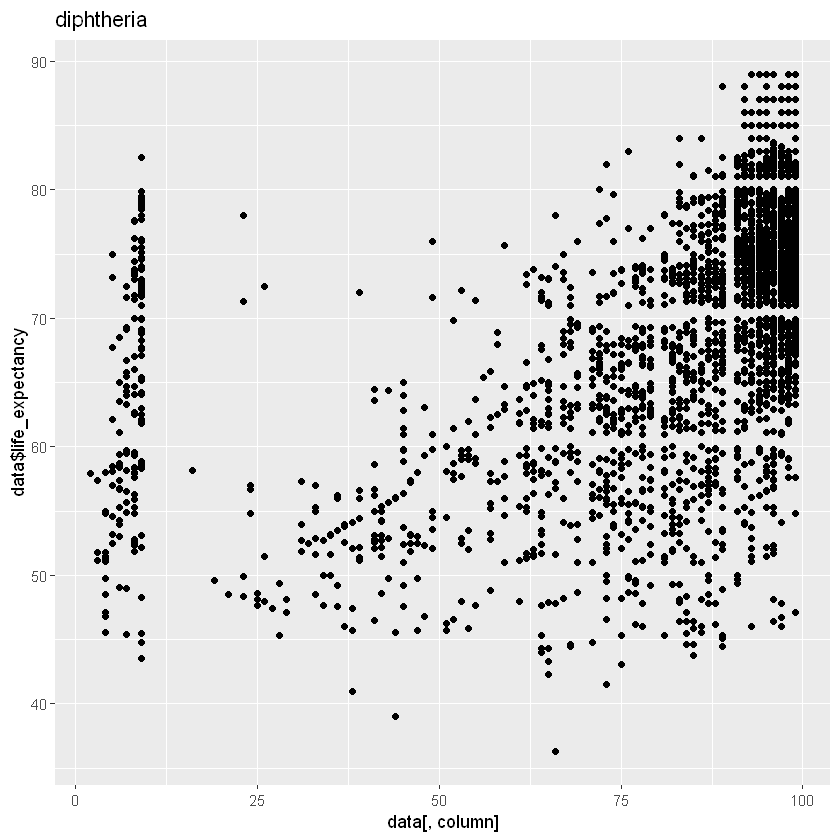

Warning message:
"Removed 453 rows containing missing values (`geom_point()`)."


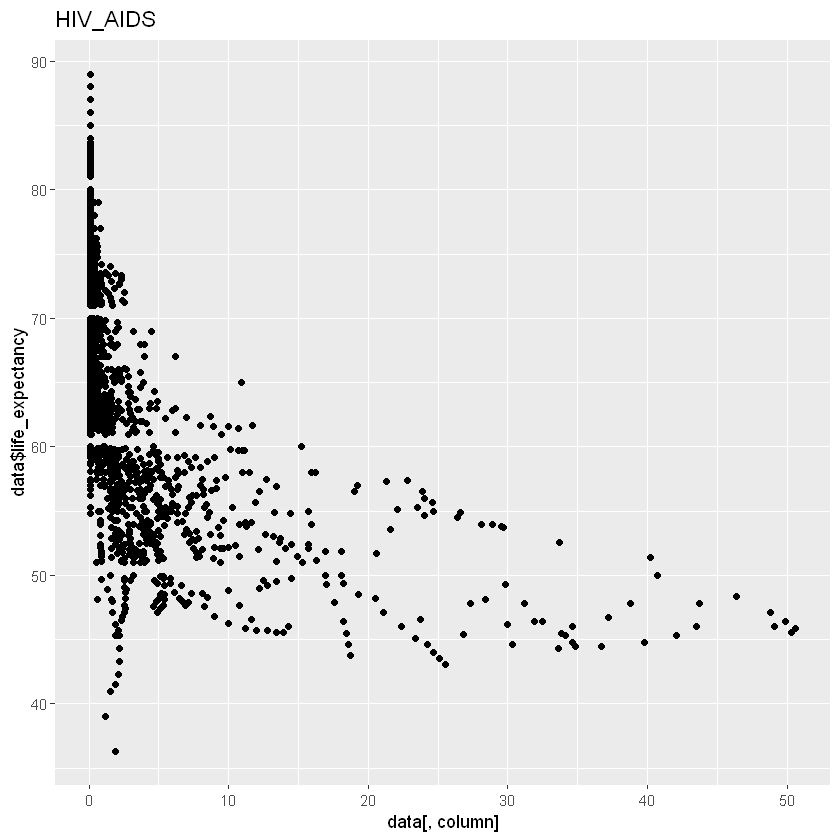

Warning message:
"Removed 654 rows containing missing values (`geom_point()`)."


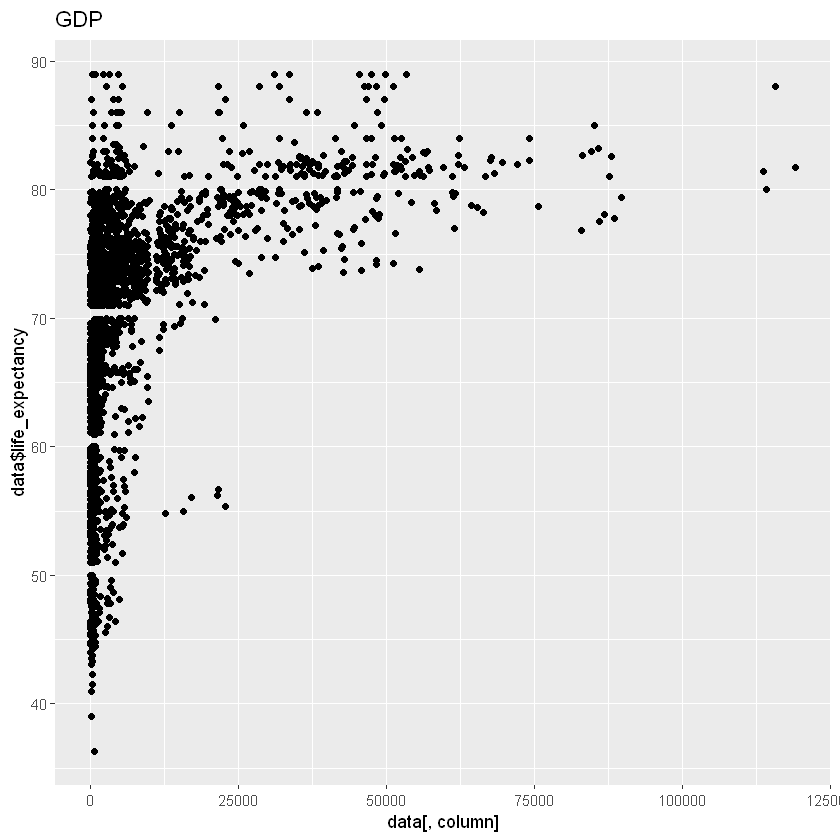

Warning message:
"Removed 42 rows containing missing values (`geom_point()`)."


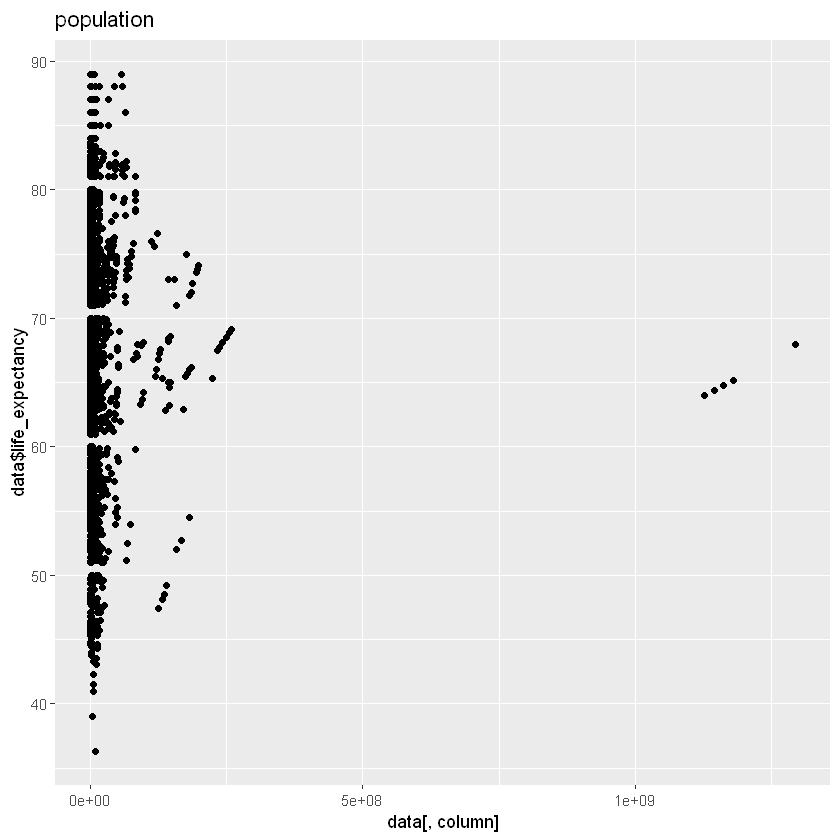

Warning message:
"Removed 42 rows containing missing values (`geom_point()`)."


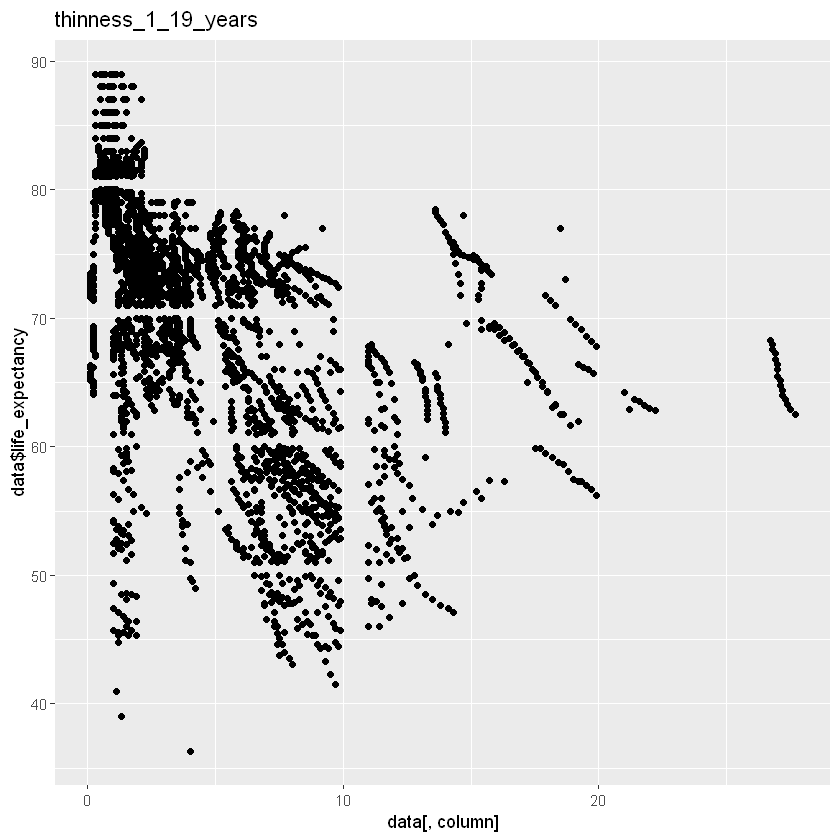

Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."


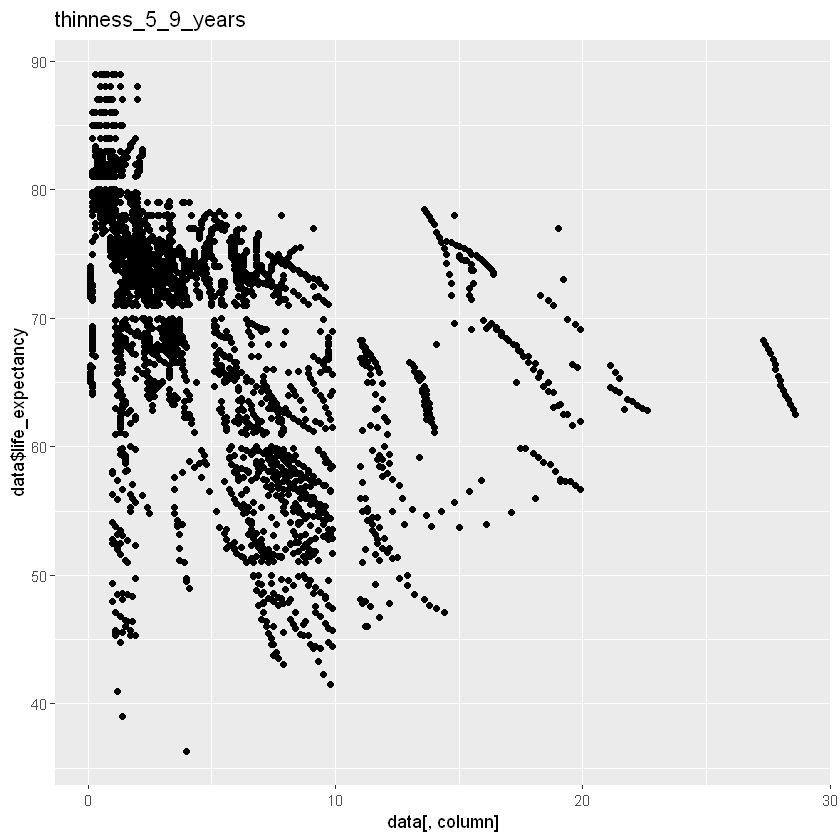

Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."


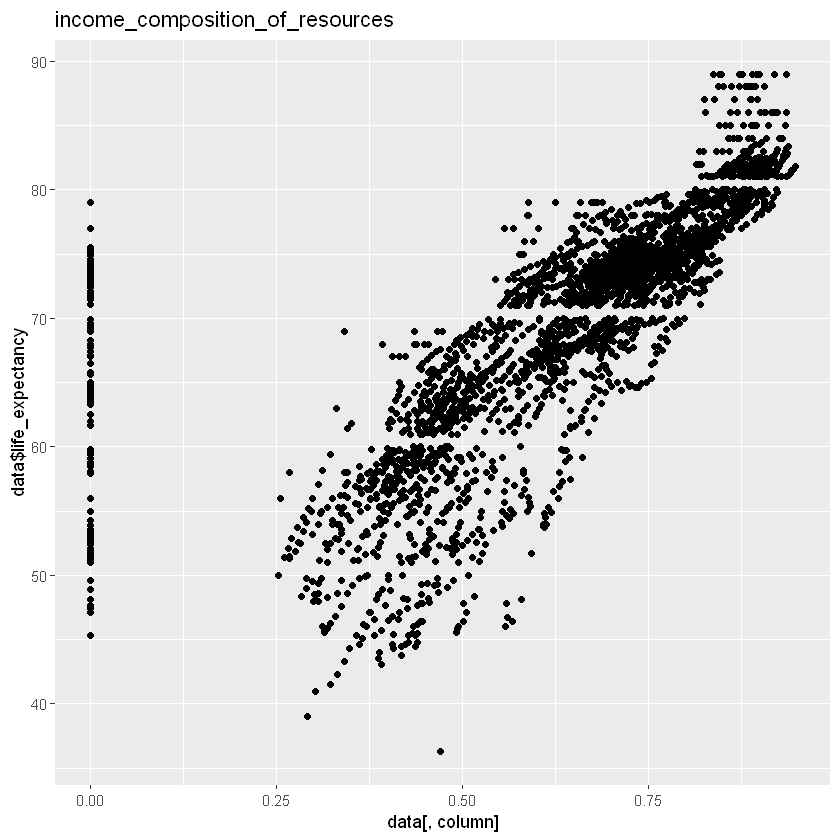

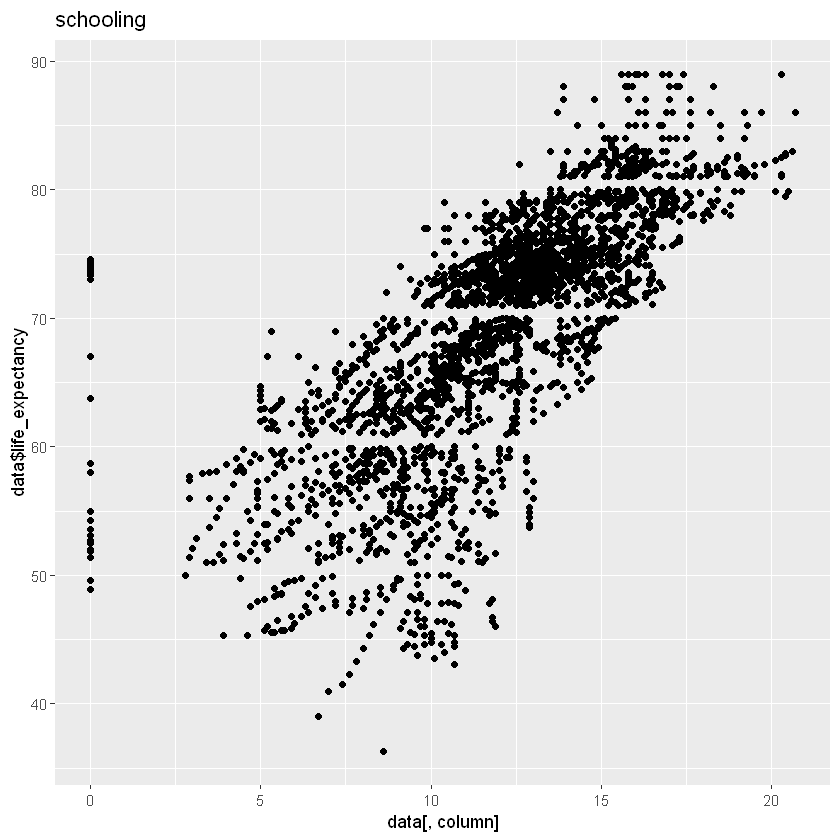

In [39]:
for (column in colnames(data[5:22])) {
    plt <- ggplot() + geom_point(aes(data[,column], data$life_expectancy)) + ggtitle(column)
    show(plt)
}